#Energy Consumption Forecast towards Net Zero Transition

Introduction:

As temperatures rise and storms grow more fierce, improving the efficiency and increasing the use of renewable energy sources is critical. In turn, understanding which nations are leading the way and which require more immediate transformations will help target efforts and hopefully, reach global goals. 

About Dataset:

Dataset can be found on https://ourworldindata.org/grapher/primary-sub-energy-source

This datasets outline the quantity of terawatt hours (TWh) produced through various sources of energy, comparing both renewable and non-renewable sources. Primary energy consumption by source datasets provide context about the quantity of energy required, how that is changing over time, and how we are doing in terms of transitioning from non-renewable to renewable energy use.

This analysis mainly provides insights into longer-terms trends that will continue to be essential in shaping future energy systems.

Forecasting analysis will be carried out in this study to prove whether the total energy mix will achieve the Net Zero emission target of 32% in 2035 and 50% in 2050.

## Preliminary Libraries

In [ ]:
# import initial libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings 

In [ ]:
# set pallete for all seaborn graph
sns.set_palette("mako_r")

## Datasets

In [ ]:
# mount google drives
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load datasets
energy = pd.read_csv ('/content/drive/MyDrive/Dataset Phyton/primary-sub-energy-source.csv')

## Background

### About Dataset

In [ ]:
# preliminary look
energy.head(5)

,Entity,Code,Year,Wind Consumption - TWh,Hydro Consumption - TWh,Solar Consumption - TWh,Nuclear Consumption - TWh,Biofuels Consumption - TWh - Total,Geo Biomass Other - TWh,Coal Consumption - TWh,Oil Consumption - TWh,Gas Consumption - TWh
0,Africa,NaN,1965,0.0,38.626764,0.0,0.0,NaN,0.0,323.496138,327.333164,9.543754
1,Africa,NaN,1966,0.0,43.083345,0.0,0.0,NaN,0.0,323.122193,358.132674,10.669916
2,Africa,NaN,1967,0.0,44.973990,0.0,0.0,NaN,0.0,330.291585,355.281459,10.545670
3,Africa,NaN,1968,0.0,52.606502,0.0,0.0,NaN,0.0,343.512911,374.852131,10.688970
4,Africa,NaN,1969,0.0,61.391360,0.0,0.0,NaN,0.0,346.642922,379.973086,12.492000


In [ ]:
# general information
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              5003 non-null   object 
 1   Code                                4219 non-null   object 
 2   Year                                5003 non-null   int64  
 3   Wind Consumption - TWh              5003 non-null   float64
 4   Hydro Consumption - TWh             5003 non-null   float64
 5   Solar Consumption - TWh             5003 non-null   float64
 6   Nuclear Consumption - TWh           5003 non-null   float64
 7   Biofuels Consumption - TWh - Total  1085 non-null   float64
 8   Geo Biomass Other - TWh             5003 non-null   float64
 9   Coal Consumption - TWh              5003 non-null   float64
 10  Oil Consumption - TWh               5003 non-null   float64
 11  Gas Consumption - TWh               5003 no

In [ ]:
# rename column for easier coding
energy = energy.rename(columns={'Entity': 'entity', 'Code': 'code', 'Year': 'year', 'Wind Consumption - TWh': 'wind', 'Hydro Consumption - TWh': 'hydro', 'Solar Consumption - TWh': 'solar', 'Nuclear Consumption - TWh': 'nuclear', 
                                'Biofuels Consumption - TWh - Total': 'biofuels', 'Geo Biomass Other - TWh': 'biomass', 'Coal Consumption - TWh': 'coal',  'Oil Consumption - TWh': 'oil', 'Gas Consumption - TWh': 'gas'})

In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5003 entries, 0 to 5002
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   entity    5003 non-null   object 
 1   code      4219 non-null   object 
 2   year      5003 non-null   int64  
 3   wind      5003 non-null   float64
 4   hydro     5003 non-null   float64
 5   solar     5003 non-null   float64
 6   nuclear   5003 non-null   float64
 7   biofuels  1085 non-null   float64
 8   biomass   5003 non-null   float64
 9   coal      5003 non-null   float64
 10  oil       5003 non-null   float64
 11  gas       5003 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 469.2+ KB


Most features have float type except entity and code. Entity for name of country, organization, or regional. All data type are true based on feature content

In [ ]:
# missing values check
energy.isna().sum()

entity         0
code         784
year           0
wind           0
hydro          0
solar          0
nuclear        0
biofuels    3918
biomass        0
coal           0
oil            0
gas            0
dtype: int64

1. Missing value Feature "code" will be drop because it only contain country initial.
2. Missing value Feature "Biofuels Consumption - TWh - Total" will be filled with 0 (zero)

In [ ]:
# drop code
energy.drop('code', axis=1, inplace=True)

In [ ]:
# fill Nan in biofuels with 0
energy['biofuels'] = energy['biofuels'].replace(np.nan, 0)

In [ ]:
energy.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000


In [ ]:
# missing values check
energy.isna().sum()

entity      0
year        0
wind        0
hydro       0
solar       0
nuclear     0
biofuels    0
biomass     0
coal        0
oil         0
gas         0
dtype: int64

No missing value

In [ ]:
# duplicated data check
energy.duplicated().sum()

0

No duplicated row

In [ ]:
# data understanding
## statistical summary
energy.describe()

,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas
count,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000,5003.000000
mean,1993.409954,24.330354,293.739092,8.061602,221.888480,11.292068,9.387567,1305.159471,1809.388628,975.018745
std,16.003587,165.022299,939.648634,71.620630,825.108999,64.095416,40.174885,4541.932472,5491.716943,3164.419387
min,1965.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.571998,0.000000
25%,1980.000000,0.000000,2.389889,0.000000,0.000000,0.000000,0.000000,4.030207,74.281155,9.491500
50%,1994.000000,0.000000,19.763947,0.000000,0.000000,0.000000,0.086252,39.109341,171.973073,68.927250
75%,2007.000000,0.244513,104.092203,0.017681,37.854332,0.000000,2.077000,315.572361,785.194706,362.947419
max,2020.000000,3925.714969,10600.727042,2111.175652,7493.275094,1099.188180,700.068651,45138.609167,53302.646333,39039.402361


All features are skewed right, mean>median.

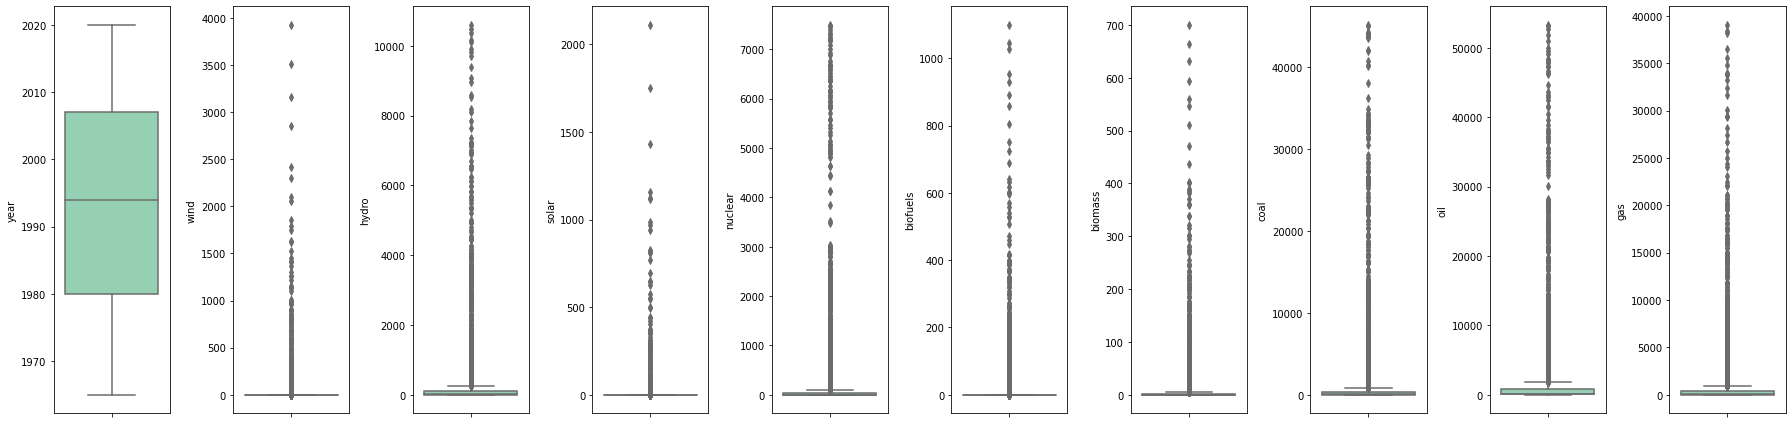

In [ ]:
# univariate analysis
# adjust the figure size for better readability
plt.figure(figsize=(25,6))

# plotting
features = energy.select_dtypes('number').columns
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=energy[features[i]])
    plt.tight_layout()

all outlier will be neglected because they are real data and it's a possible data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

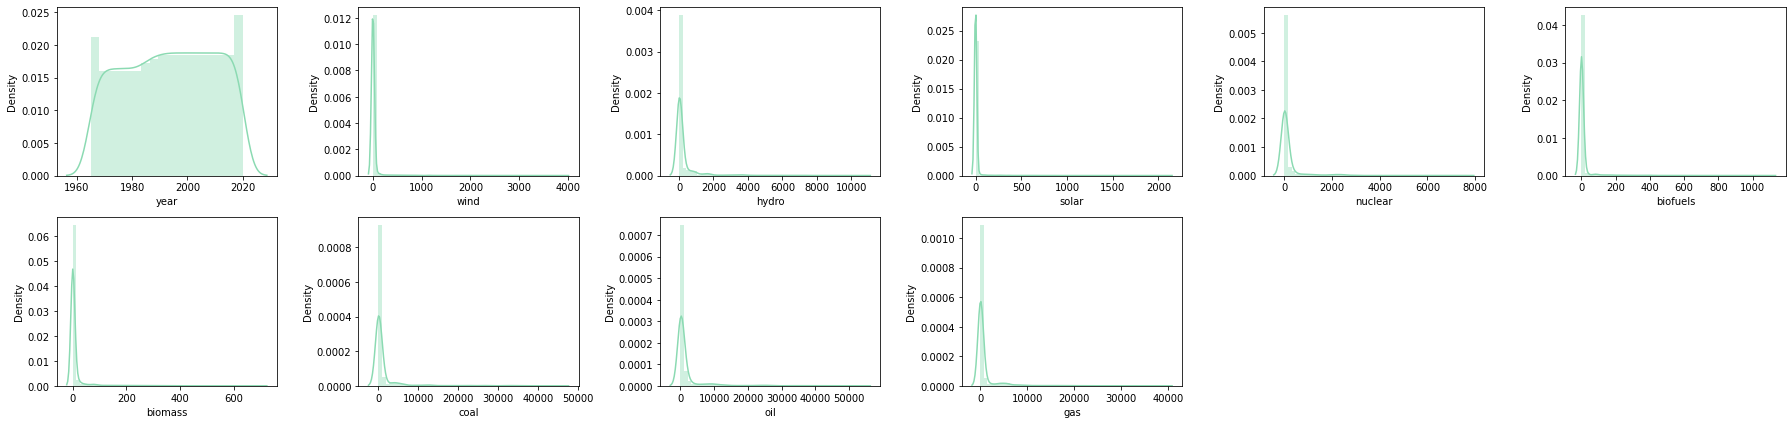

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(25,6))

features = energy.select_dtypes('number').columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=energy[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

Observation:

All features is skewed right



### World Energy Consumption

In [ ]:
# calculate world energy consumption each year
energy.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000


In [ ]:
# calculate total energy consumption each year
energy['energy_total']= energy['wind']+energy['hydro']+energy['solar']+energy['nuclear']+energy['biofuels']+energy['biomass']+energy['coal']+energy['oil']+energy['gas']# add feature for energy_total
energy.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754,698.999821
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916,735.008128
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670,741.092703
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970,781.660513
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000,800.499367


In [ ]:
# check content of entity
energy.groupby(['entity']).agg(
   distinct_name = ('entity','nunique'))

,distinct_name
entity,
Africa,1
Algeria,1
Argentina,1
Asia Pacific,1
Australia,1
...,...
Uzbekistan,1
Venezuela,1
Vietnam,1


there are data about world

In [ ]:
filter_world = energy[energy['entity']=='World']
filter_world

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total
4947,World,1965,0.000000,2564.438677,0.000000,70.943678,0.000000,17.985232,16140.178286,17977.563869,6303.798931,43074.908674
4948,World,1966,0.000000,2732.825103,0.000000,95.648029,0.000000,19.806007,16324.093847,19334.403361,6868.794525,45375.570872
4949,World,1967,0.000000,2793.729589,0.000000,113.905594,0.000000,19.986571,16060.809733,20719.055125,7374.039372,47081.525985
4950,World,1968,0.000000,2942.469467,0.000000,144.758789,0.000000,22.120045,16301.146678,22475.139064,8044.331494,49929.965537
4951,World,1969,0.000000,3115.953392,0.000000,171.620588,0.000000,23.257964,16798.735842,24332.447222,8833.418067,53275.433074
4952,World,1970,0.000000,3262.909933,0.000000,219.096270,0.000000,25.693196,17058.608125,26484.396344,9614.791739,56665.495607
4953,World,1971,0.000000,3408.513903,0.000000,304.733826,0.000000,27.879168,16965.959258,27977.600861,10292.192661,58976.879678
4954,World,1972,0.000000,3568.417689,0.000000,422.708747,0.000000,29.877101,17158.636739,30106.235000,10861.359106,62147.234381
4955,World,1973,0.000000,3619.470800,0.000000,566.393276,0.000000,32.084924,17667.849544,32521.650889,11376.719886,65784.169319
4956,World,1974,0.000000,3975.736067,0.000000,740.555815,0.000000,33.958814,17682.051217,32061.847917,11656.274567,66150.424395


In [ ]:
# select only year and energy_total
world = filter_world[['year','energy_total']].reset_index()
world.head(5)

,index,year,energy_total
0,4947,1965,43074.908674
1,4948,1966,45375.570872
2,4949,1967,47081.525985
3,4950,1968,49929.965537
4,4951,1969,53275.433074


Text(2018, 150000, 'Covid-19 Pandemic')

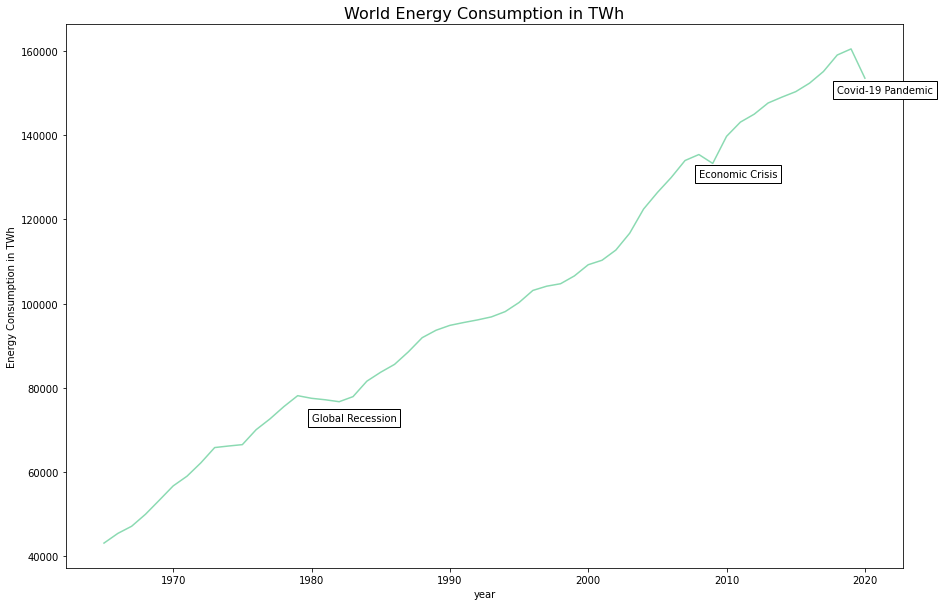

In [ ]:
# total world energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
world_viz = sns.lineplot(x="year", y="energy_total",
                    data=world)
world_viz.set_title("World Energy Consumption in TWh", size=16) # set title
world_viz.set_ylabel("Energy Consumption in TWh") # set y label
world_viz.text(1980, 72000, 'Global Recession', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
world_viz.text(2008, 130000, 'Economic Crisis', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
world_viz.text(2018, 150000, 'Covid-19 Pandemic', bbox=dict(facecolor='white', alpha=1)) # insert text

Energy consumption in the world increases each year. But, there were three changes in 1980-1982 (Economy Recession), 2008-2009 (Global Economic Crisis) and 2019-2020 (Covid-19 Pandemic). The distance between these two abrupt changes is of 10 years. Economic Crisis and Covid-19 Pandemic reduce global energy consumption due to high oil prices.

Text(2014, -4.7, 'Covid-19 Pandemic')

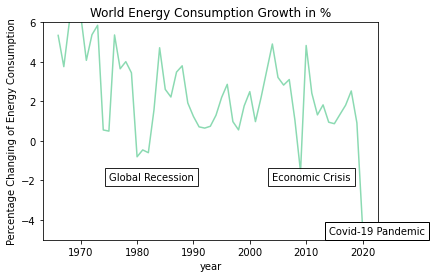

In [ ]:
world['percent_change'] = world['energy_total'].pct_change().mul(100)
world_growth = sns.lineplot(x="year", y="percent_change",
                            data=world)
world_growth.set(ylim=(-5, 6))
world_growth.set_title("World Energy Consumption Growth in %")
world_growth.set_ylabel("Percentage Changing of Energy Consumption")
world_growth.text(1975, -2, 'Global Recession', 
        bbox=dict(facecolor='white', alpha=0.85))
world_growth.text(2004, -2, 'Economic Crisis', 
        bbox=dict(facecolor='white', alpha=0.85))
world_growth.text(2014, -4.7, 'Covid-19 Pandemic',
        bbox=dict(facecolor='white'))

World total energy consumption growth has negative value  in 1980-1982 (Economy Recession), 2008-2009 (Global Economic Crisis) and 2019-2020 (Covid-19 Pandemic)

### Renewable Consumption

In [ ]:
energy.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754,698.999821
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916,735.008128
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670,741.092703
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970,781.660513
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000,800.499367


In [ ]:
# add feature for total renewable energy
energy['renewable_total']= energy['wind']+energy['hydro']+energy['solar']+energy['biofuels']+energy['biomass']+energy['nuclear']# add feature for renewable_total
energy.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754,698.999821,38.626764
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916,735.008128,43.083345
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670,741.092703,44.973990
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970,781.660513,52.606502
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000,800.499367,61.391360


In [ ]:
# select only on world entity
filter_world = energy[energy['entity']=='World']
filter_world

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
4947,World,1965,0.000000,2564.438677,0.000000,70.943678,0.000000,17.985232,16140.178286,17977.563869,6303.798931,43074.908674,2653.367588
4948,World,1966,0.000000,2732.825103,0.000000,95.648029,0.000000,19.806007,16324.093847,19334.403361,6868.794525,45375.570872,2848.279138
4949,World,1967,0.000000,2793.729589,0.000000,113.905594,0.000000,19.986571,16060.809733,20719.055125,7374.039372,47081.525985,2927.621754
4950,World,1968,0.000000,2942.469467,0.000000,144.758789,0.000000,22.120045,16301.146678,22475.139064,8044.331494,49929.965537,3109.348301
4951,World,1969,0.000000,3115.953392,0.000000,171.620588,0.000000,23.257964,16798.735842,24332.447222,8833.418067,53275.433074,3310.831944
4952,World,1970,0.000000,3262.909933,0.000000,219.096270,0.000000,25.693196,17058.608125,26484.396344,9614.791739,56665.495607,3507.699399
4953,World,1971,0.000000,3408.513903,0.000000,304.733826,0.000000,27.879168,16965.959258,27977.600861,10292.192661,58976.879678,3741.126897
4954,World,1972,0.000000,3568.417689,0.000000,422.708747,0.000000,29.877101,17158.636739,30106.235000,10861.359106,62147.234381,4021.003536
4955,World,1973,0.000000,3619.470800,0.000000,566.393276,0.000000,32.084924,17667.849544,32521.650889,11376.719886,65784.169319,4217.949000
4956,World,1974,0.000000,3975.736067,0.000000,740.555815,0.000000,33.958814,17682.051217,32061.847917,11656.274567,66150.424395,4750.250695


In [ ]:
# select renewable energy consumption
renewable = filter_world[['year','renewable_total']].reset_index()
renewable.head(5)

,index,year,renewable_total
0,4947,1965,2653.367588
1,4948,1966,2848.279138
2,4949,1967,2927.621754
3,4950,1968,3109.348301
4,4951,1969,3310.831944


Text(0, 0.5, 'Energy Consumption in TWh')

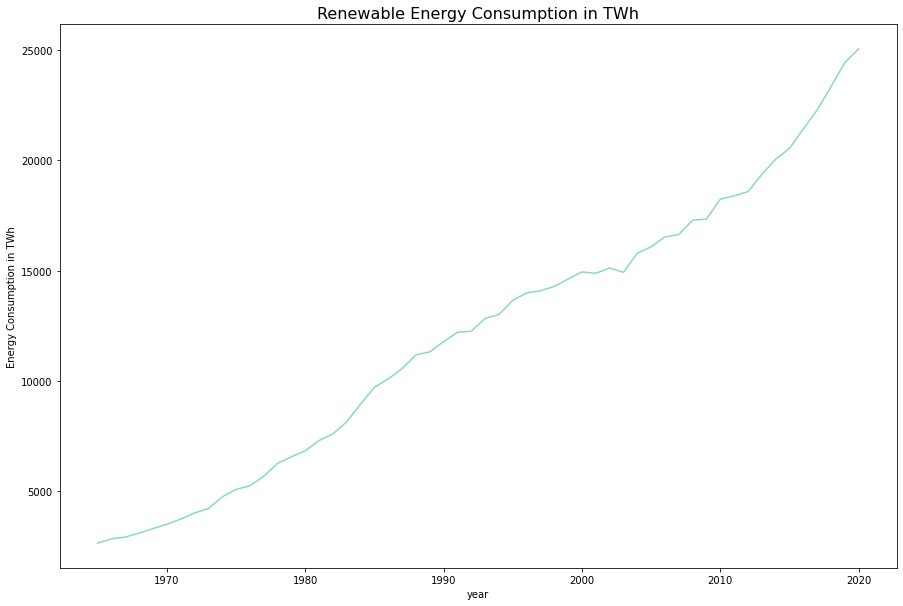

In [ ]:
# renewable energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
renewable_viz = sns.lineplot(x="year", y="renewable_total",
                    data=renewable)
renewable_viz.set_title("Renewable Energy Consumption in TWh", size=16) # set title
renewable_viz.set_ylabel("Energy Consumption in TWh") # set y label

Renewable energy consumption is increasing every year.

In [ ]:
# temporary variable for visualization
temp = filter_world.iloc[[-1]]
temp = temp [['energy_total', 'renewable_total']].reset_index(drop = True)
temp

,energy_total,renewable_total
0,153593.345591,25043.893091


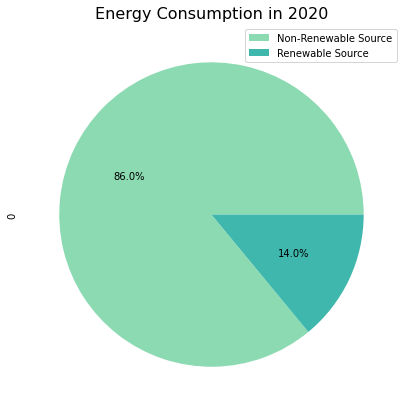

In [ ]:
# visualization pie chart
fig, ax = plt.subplots(1, figsize=(7,7))
temp.iloc[0].plot(kind='pie',labels = ['',''], ax=ax, autopct='%1.1f%%')
plt.title('Energy Consumption in 2020', size=16)
plt.legend(labels=['Non-Renewable Source', 'Renewable Source'])
plt.show()

Only 14% of total energy consumption comes from renewable energy.

In [ ]:
filter_world

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
4947,World,1965,0.000000,2564.438677,0.000000,70.943678,0.000000,17.985232,16140.178286,17977.563869,6303.798931,43074.908674,2653.367588
4948,World,1966,0.000000,2732.825103,0.000000,95.648029,0.000000,19.806007,16324.093847,19334.403361,6868.794525,45375.570872,2848.279138
4949,World,1967,0.000000,2793.729589,0.000000,113.905594,0.000000,19.986571,16060.809733,20719.055125,7374.039372,47081.525985,2927.621754
4950,World,1968,0.000000,2942.469467,0.000000,144.758789,0.000000,22.120045,16301.146678,22475.139064,8044.331494,49929.965537,3109.348301
4951,World,1969,0.000000,3115.953392,0.000000,171.620588,0.000000,23.257964,16798.735842,24332.447222,8833.418067,53275.433074,3310.831944
4952,World,1970,0.000000,3262.909933,0.000000,219.096270,0.000000,25.693196,17058.608125,26484.396344,9614.791739,56665.495607,3507.699399
4953,World,1971,0.000000,3408.513903,0.000000,304.733826,0.000000,27.879168,16965.959258,27977.600861,10292.192661,58976.879678,3741.126897
4954,World,1972,0.000000,3568.417689,0.000000,422.708747,0.000000,29.877101,17158.636739,30106.235000,10861.359106,62147.234381,4021.003536
4955,World,1973,0.000000,3619.470800,0.000000,566.393276,0.000000,32.084924,17667.849544,32521.650889,11376.719886,65784.169319,4217.949000
4956,World,1974,0.000000,3975.736067,0.000000,740.555815,0.000000,33.958814,17682.051217,32061.847917,11656.274567,66150.424395,4750.250695


In [ ]:
# temporary variable for barplot
temp1 = filter_world.iloc[[-1]]
temp1 = temp1 [['wind', 'hydro', 'solar', 'biofuels', 'biomass']].reset_index(drop = True)
temp1

,wind,hydro,solar,biofuels,biomass
0,3925.714969,10600.727042,2111.175652,1044.729408,700.068651


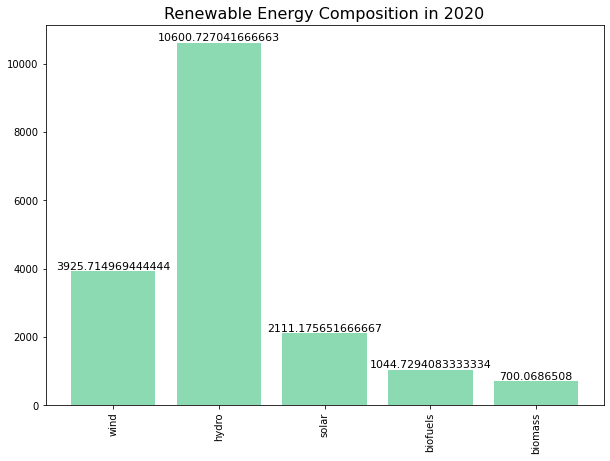

In [ ]:
temp = pd.melt(temp1)
fig, ax = plt.subplots(1, figsize=(10,7))

X_total=temp['variable']
y_total=temp['value']
plt.bar(X_total, y_total)
plt.title('Renewable Energy Composition in 2020', size=16)
ax.tick_params(axis='x', rotation=90)

for u, w in enumerate(temp['value']):
    ax.text(u, w, str(w), ha='center', va='bottom', fontsize=11)
plt.show()

The rank of renewable energy consumption are.
1. Hydro
2. Wind
3. Solar
4. Biofuels
5. Biomass

## Data Analysis

In [ ]:
# copy dataset from energy
energy_analysis = energy.copy()

In [ ]:
energy_analysis

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,Africa,1965,0.000000,38.626764,0.000000,0.000000,0.000000,0.000000,323.496138,327.333164,9.543754,698.999821,38.626764
1,Africa,1966,0.000000,43.083345,0.000000,0.000000,0.000000,0.000000,323.122193,358.132674,10.669916,735.008128,43.083345
2,Africa,1967,0.000000,44.973990,0.000000,0.000000,0.000000,0.000000,330.291585,355.281459,10.545670,741.092703,44.973990
3,Africa,1968,0.000000,52.606502,0.000000,0.000000,0.000000,0.000000,343.512911,374.852131,10.688970,781.660513,52.606502
4,Africa,1969,0.000000,61.391360,0.000000,0.000000,0.000000,0.000000,346.642922,379.973086,12.492000,800.499367,61.391360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4998,World,2016,2419.802622,10106.126783,825.820790,6573.431011,930.265483,560.681082,43501.654556,51908.105111,35586.370667,152412.258105,21416.127772
4999,World,2017,2850.777372,10166.795689,1115.135411,6593.086728,954.038441,593.790980,43721.381222,52640.103972,36536.593944,155171.703760,22273.624621
5000,World,2018,3155.241097,10380.656056,1433.943159,6702.019547,1028.367301,632.173911,44238.975333,53146.716556,38378.961722,159097.054682,23332.401071
5001,World,2019,3511.696050,10469.154283,1752.959449,6924.992211,1099.188180,663.134292,43788.651056,53302.646333,39039.402361,160551.824215,24421.124465


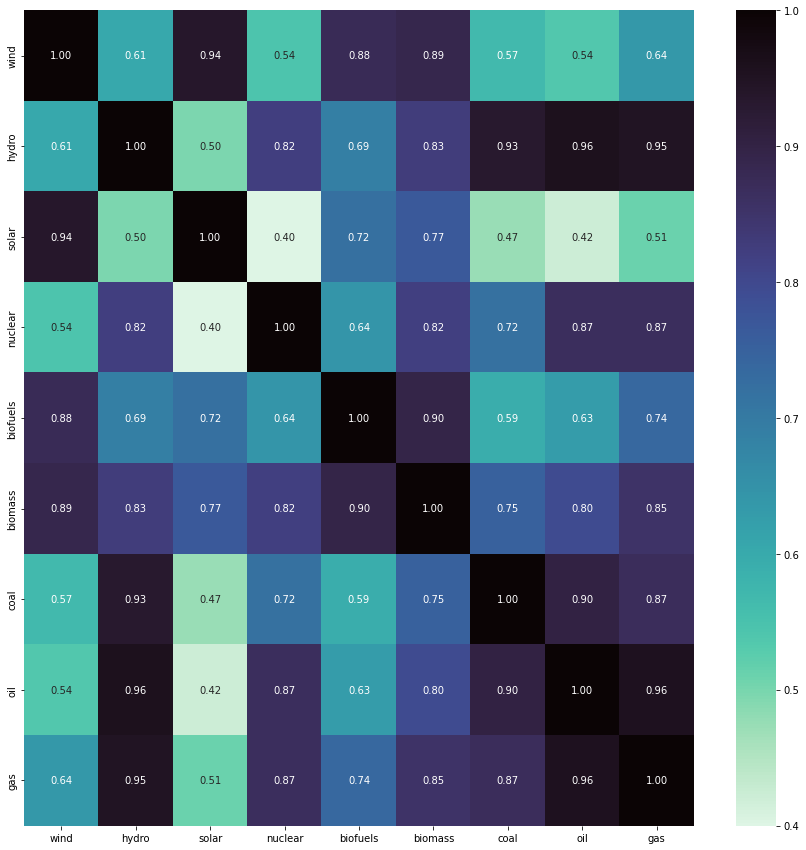

In [ ]:
# Multivariate Analysis
plt.figure(figsize=(15,15))
correlation = energy_analysis.drop(["year","energy_total", 'renewable_total'], axis='columns').corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap="mako_r")

Observation:
1. Wind energy is highly correlated with solar, biofuels, and biomass
2. Hydro is highly correlated with gasm oil, coal, nuclear.
3. Solar energy is highly correlated with wind.
4. Nuclear is highly correlated with gas, oil, biomass, and wind.
5. Biofuels is highly correlated with biomass and wind.
6. Biomass is highly correlated with gas, oil, biofuels, nuclear, and wind.
7. Coal is highly correlated with gas, oil, and hydro.
8. Oil is highly correlated with gas, coal, biomass, nuclear, and hydro.
9. gas is highly correlated with oil, coal, biomass, biofuels, nuclear, and hydro.

In [ ]:
viz = energy[energy['entity']=='World']

In [ ]:
viz.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
4947,World,1965,0.0,2564.438677,0.0,70.943678,0.0,17.985232,16140.178286,17977.563869,6303.798931,43074.908674,2653.367588
4948,World,1966,0.0,2732.825103,0.0,95.648029,0.0,19.806007,16324.093847,19334.403361,6868.794525,45375.570872,2848.279138
4949,World,1967,0.0,2793.729589,0.0,113.905594,0.0,19.986571,16060.809733,20719.055125,7374.039372,47081.525985,2927.621754
4950,World,1968,0.0,2942.469467,0.0,144.758789,0.0,22.120045,16301.146678,22475.139064,8044.331494,49929.965537,3109.348301
4951,World,1969,0.0,3115.953392,0.0,171.620588,0.0,23.257964,16798.735842,24332.447222,8833.418067,53275.433074,3310.831944


In [ ]:
temp3 = viz.drop(['entity','energy_total','renewable_total'], axis='columns')

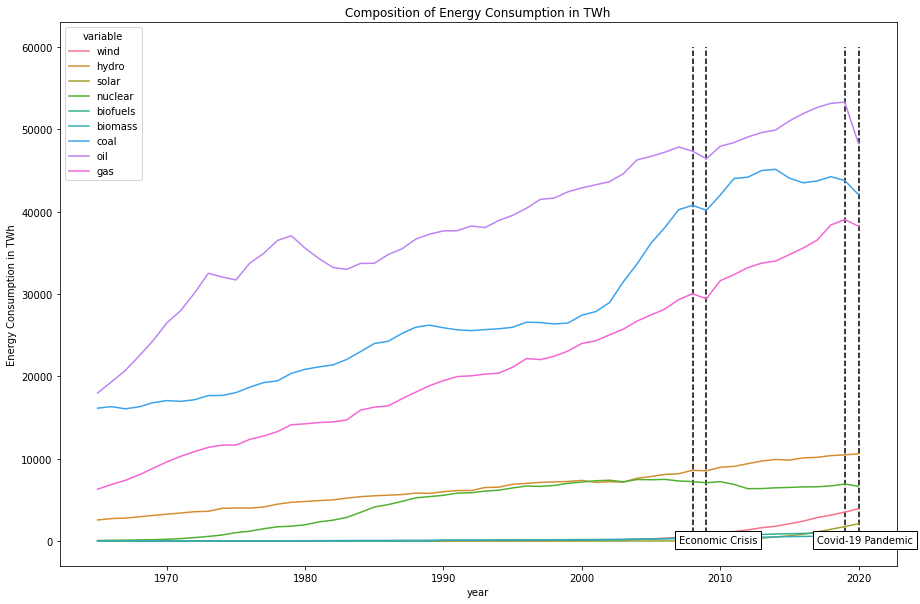

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
other = sns.lineplot(x='year', y='value', hue='variable', color='viridis',
             data=pd.melt(temp3, ['year']))
other.set_title("Composition of Energy Consumption in TWh")
other.set_ylabel("Energy Consumption in TWh")
other.text(2007, -200, 'Economic Crisis', 
       bbox=dict(facecolor='white', alpha=1))
other.text(2017, -200, 'Covid-19 Pandemic', bbox=dict(facecolor='white', alpha=1))
plt.vlines(2020, 0, 60000, linestyles='dashed')
plt.vlines(2019, 0, 60000, linestyles='dashed')
plt.vlines(2009, 0, 60000, linestyles='dashed')
plt.vlines(2008, 0, 60000, linestyles='dashed')

Oil, gas, and coal are energy source which mostly use in the world. It is highly affected by world economy condition.

In [ ]:
# Checking unique of entity features
def different (dataframe):
  for i in dataframe:
    if dataframe[i].dtypes == 'object':
      print(f'{i}: {dataframe[i].unique()}')

different (energy_analysis)

entity: ['Africa' 'Algeria' 'Argentina' 'Asia Pacific' 'Australia' 'Austria'
 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'CIS'
 'Canada' 'Central America' 'Chile' 'China' 'Colombia' 'Croatia' 'Cyprus'
 'Czechia' 'Denmark' 'Eastern Africa' 'Ecuador' 'Egypt' 'Estonia' 'Europe'
 'European Union' 'Finland' 'France' 'Germany' 'Greece' 'Hong Kong'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Kuwait' 'Latvia' 'Lithuania' 'Luxembourg'
 'Malaysia' 'Mexico' 'Middle Africa' 'Middle East' 'Morocco' 'Netherlands'
 'New Zealand' 'Non-OECD' 'North America' 'North Macedonia' 'Norway'
 'OECD' 'Oman' 'Pakistan' 'Peru' 'Philippines' 'Poland' 'Portugal' 'Qatar'
 'Romania' 'Russia' 'Saudi Arabia' 'Singapore' 'Slovakia' 'Slovenia'
 'South & Central America' 'South Africa' 'South Korea' 'Spain'
 'Sri Lanka' 'Sweden' 'Switzerland' 'Taiwan' 'Thailand'
 'Trinidad and Tobago' 'Turkey' 'Turkmenistan' 'Ukraine'
 'United Arab Emirate

Based on unique value, entity is separated belong to its nature:
Continent:'Africa' , 'Asia Pacific', 'Central America', 'Eastern Africa', 'Europe', 'Middle Africa', 'South & Central America', 'South Africa', 'Western Africa' , 'World'

Organization:'CIS', 'European Union', 'Middle East', 'Non-OECD', OECD', 

Country: 'Algeria', 'Argentina',  'Australia', 'Austria',
 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria' 
 'Canada',  'Chile', 'China', 'Colombia', 'Croatia', 'Cyprus'
 'Czechia', 'Denmark',  'Ecuador', 'Egypt', 'Estonia', 
  'Finland' 'France', 'Germany', 'Greece', 'Hong Kong',
 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran' 'Iraq', 'Ireland' 'Israel','Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania' 'Luxembourg', 'Malaysia', 'Mexico',   'Morocco', 'Netherlands'
, 'New Zealand',  'North America', 'North Macedonia', 'Norway','Oman' 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar',
 'Romania', 'Russia', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia',
  'South Korea', 'Spain',
 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand',
 'Trinidad and Tobago', 'Turkey', 'Turkmenistan', 'Ukraine',
 'United Arab Emirates', 'United Kingdom', 'United States', 'Uzbekistan',
 'Venezuela', 'Vietnam'

In [ ]:
# filter for organization
org_filter = energy_analysis['entity'].isin(['CIS', 'European Union', 'Middle East', 'Non-OECD', 'OECD'])
org = energy_analysis [org_filter]

In [ ]:
org.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
626,CIS,1965,0.0,226.205556,0.0,5.168243,0.0,0.0,3459.188281,1994.849561,1216.758272,6902.169912,231.373798
627,CIS,1966,0.0,255.063889,0.0,5.732944,0.0,0.0,3585.219047,2136.247404,1357.374337,7339.637622,260.796833
628,CIS,1967,0.0,246.030556,0.0,6.260817,0.0,0.0,3640.720269,2327.543618,1494.425075,7714.980335,252.291372
629,CIS,1968,0.0,289.000000,0.0,8.703763,0.0,0.0,3608.970369,2481.116069,1613.604044,8001.394246,297.703763
630,CIS,1969,0.0,319.947222,0.0,10.090963,0.0,0.0,3660.707675,2638.378978,1724.433830,8353.558668,330.038186


In [ ]:
# filter for continent
continent_filter = energy_analysis['entity'].isin(['Africa' , 'Asia Pacific', 'Central America', 'Eastern Africa', 'Europe', 'Middle Africa', 'South & Central America', 'South Africa', 'Western Africa','North America'])
continent = energy_analysis [continent_filter]
continent.head()

,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,Africa,1965,0.0,38.626764,0.0,0.0,0.0,0.0,323.496138,327.333164,9.543754,698.999821,38.626764
1,Africa,1966,0.0,43.083345,0.0,0.0,0.0,0.0,323.122193,358.132674,10.669916,735.008128,43.083345
2,Africa,1967,0.0,44.973990,0.0,0.0,0.0,0.0,330.291585,355.281459,10.545670,741.092703,44.973990
3,Africa,1968,0.0,52.606502,0.0,0.0,0.0,0.0,343.512911,374.852131,10.688970,781.660513,52.606502
4,Africa,1969,0.0,61.391360,0.0,0.0,0.0,0.0,346.642922,379.973086,12.492000,800.499367,61.391360


In [ ]:
# filter for country
country = energy_analysis [~org_filter]
country = country [~continent_filter]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
country = country.reset_index()

In [ ]:
country

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,56,Algeria,1965,0.000000,1.111111,0.000000,0.000000,0.000000,0.000000,0.814100,15.405252,7.430500,24.760963,1.111111
1,57,Algeria,1966,0.000000,0.986111,0.000000,0.000000,0.000000,0.000000,0.790840,20.272705,7.719250,29.768906,0.986111
2,58,Algeria,1967,0.000000,1.138889,0.000000,0.000000,0.000000,0.000000,0.604760,18.942031,7.488250,28.173930,1.138889
3,59,Algeria,1968,0.000000,1.563889,0.000000,0.000000,0.000000,0.000000,0.639650,20.167301,7.873250,30.244090,1.563889
4,60,Algeria,1969,0.000000,1.002778,0.000000,0.000000,0.000000,0.000000,0.814100,21.305930,10.351688,33.474495,1.002778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158,4998,World,2016,2419.802622,10106.126783,825.820790,6573.431011,930.265483,560.681082,43501.654556,51908.105111,35586.370667,152412.258105,21416.127772
4159,4999,World,2017,2850.777372,10166.795689,1115.135411,6593.086728,954.038441,593.790980,43721.381222,52640.103972,36536.593944,155171.703760,22273.624621
4160,5000,World,2018,3155.241097,10380.656056,1433.943159,6702.019547,1028.367301,632.173911,44238.975333,53146.716556,38378.961722,159097.054682,23332.401071
4161,5001,World,2019,3511.696050,10469.154283,1752.959449,6924.992211,1099.188180,663.134292,43788.651056,53302.646333,39039.402361,160551.824215,24421.124465


#### Continent Energy Consumption

In [ ]:
temp_continent =continent[[ 'entity', 'year', 'energy_total']]

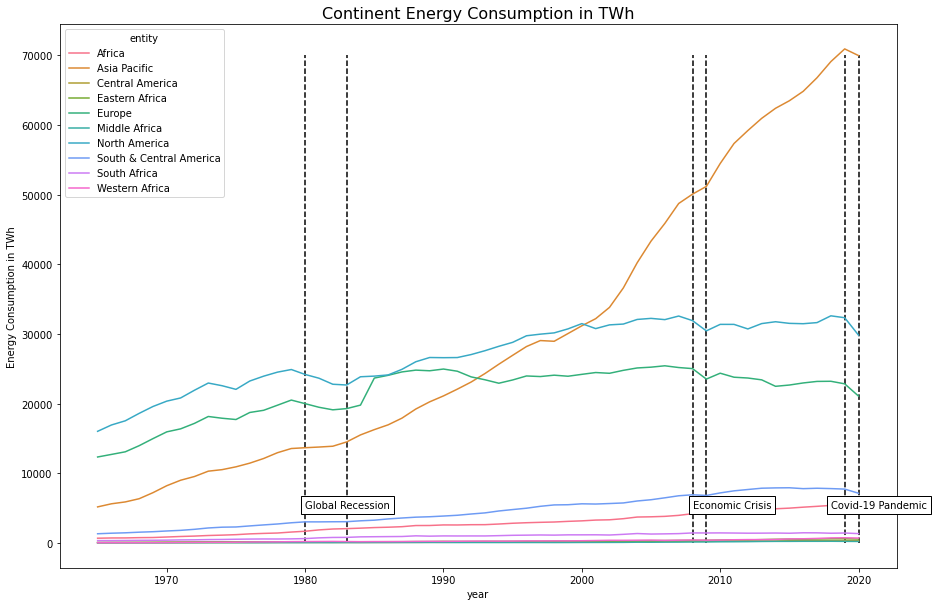

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
cont_viz = sns.lineplot(x="year", y="energy_total", hue= 'entity',
                    data=temp_continent)
cont_viz.set_title("Continent Energy Consumption in TWh", size=16) # set title
cont_viz.set_ylabel("Energy Consumption in TWh") # set y label
cont_viz.text(1980, 5000, 'Global Recession', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
cont_viz.text(2008, 5000, 'Economic Crisis', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
cont_viz.text(2018, 5000, 'Covid-19 Pandemic', bbox=dict(facecolor='white', alpha=1)) # insert text
plt.vlines(1980, 0, 70000, linestyles='dashed')
plt.vlines(1983, 0, 70000, linestyles='dashed')
plt.vlines(2020, 0, 70000, linestyles='dashed')
plt.vlines(2019, 0, 70000, linestyles='dashed')
plt.vlines(2009, 0, 70000, linestyles='dashed')
plt.vlines(2008, 0, 70000, linestyles='dashed')

Asia pasific are the continet which consume highest energy. Asia pasific, north america, and europe are highly effected by global economic condition.

In [ ]:
# temporary variable for organization
temp_org =org[[ 'entity', 'year', 'energy_total']]

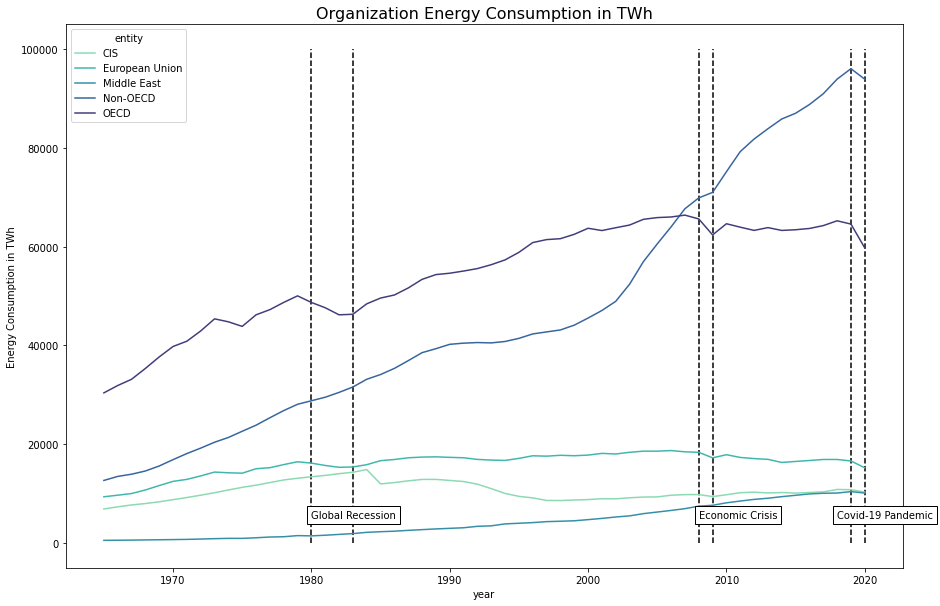

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
org_viz = sns.lineplot(x="year", y="energy_total", hue= 'entity',
                    data=temp_org)
org_viz.set_title("Organization Energy Consumption in TWh", size=16) # set title
org_viz.set_ylabel("Energy Consumption in TWh") # set y label
org_viz.text(1980, 5000, 'Global Recession', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
org_viz.text(2008, 5000, 'Economic Crisis', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
org_viz.text(2018, 5000, 'Covid-19 Pandemic', bbox=dict(facecolor='white', alpha=1)) # insert text
plt.vlines(1980, 0, 100000, linestyles='dashed')
plt.vlines(1983, 0, 100000, linestyles='dashed')
plt.vlines(2020, 0, 100000, linestyles='dashed')
plt.vlines(2019, 0, 100000, linestyles='dashed')
plt.vlines(2009, 0, 100000, linestyles='dashed')
plt.vlines(2008, 0, 100000, linestyles='dashed')

OECD and European energy consumption is affected by world economy condition.

In [ ]:
country.head()

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,56,Algeria,1965,0.0,1.111111,0.0,0.0,0.0,0.0,0.81410,15.405252,7.430500,24.760963,1.111111
1,57,Algeria,1966,0.0,0.986111,0.0,0.0,0.0,0.0,0.79084,20.272705,7.719250,29.768906,0.986111
2,58,Algeria,1967,0.0,1.138889,0.0,0.0,0.0,0.0,0.60476,18.942031,7.488250,28.173930,1.138889
3,59,Algeria,1968,0.0,1.563889,0.0,0.0,0.0,0.0,0.63965,20.167301,7.873250,30.244090,1.563889
4,60,Algeria,1969,0.0,1.002778,0.0,0.0,0.0,0.0,0.81410,21.305930,10.351688,33.474495,1.002778


In [ ]:
temp_country = country[[ 'entity', 'year', 'energy_total']]

In [ ]:
temp_country

,entity,year,energy_total
0,Algeria,1965,24.760963
1,Algeria,1966,29.768906
2,Algeria,1967,28.173930
3,Algeria,1968,30.244090
4,Algeria,1969,33.474495
...,...,...,...
4158,World,2016,152412.258105
4159,World,2017,155171.703760
4160,World,2018,159097.054682
4161,World,2019,160551.824215


In [ ]:
country_filter = temp_country['year'].isin([2020])

In [ ]:
temp_country= temp_country[country_filter]
temp_country

,entity,year,energy_total
55,Algeria,2020,638.496419
111,Argentina,2020,874.004311
167,Australia,2020,1541.826678
223,Austria,2020,376.651691
259,Azerbaijan,2020,172.600256
...,...,...,...
3958,United States,2020,24274.675985
3994,Uzbekistan,2020,520.179786
4050,Venezuela,2020,400.429192
4106,Vietnam,2020,1135.832862


In [ ]:
# top 20 world energy consumption
temp_country.sort_values(by=['energy_total'], ascending=False).head(21)

,entity,year,energy_total
4162,World,2020,153593.345591
681,China,2020,40205.612739
3958,United States,2020,24274.675985
1532,India,2020,8837.288286
3015,Russia,2020,7862.609703
1924,Japan,2020,4674.827030
569,Canada,2020,3770.207007
1644,Iran,2020,3341.653124
1252,Germany,2020,3289.622781
457,Brazil,2020,3254.323685


In [ ]:
# top 20 world energy consumption
temp_country.sort_values(by=['energy_total'], ascending=False).head(21).reset_index()

,index,entity,year,energy_total
0,4162,World,2020,153593.345591
1,681,China,2020,40205.612739
2,3958,United States,2020,24274.675985
3,1532,India,2020,8837.288286
4,3015,Russia,2020,7862.609703
5,1924,Japan,2020,4674.827030
6,569,Canada,2020,3770.207007
7,1644,Iran,2020,3341.653124
8,1252,Germany,2020,3289.622781
9,457,Brazil,2020,3254.323685


In [ ]:
temp_top_energy = country['entity'].isin(['China', 'United States', 'India', 'Russia', 'Japan', 'Canada', 'Iran', 'Germany', 'Brazil', 'South Korea', 'Saudi Arabia', 'France', 'United Kingdom', 'Indonesia', 'Turkey', 'Mexico', 'Italy', 'Ukraine',  'Thailand', 'Spain', 'Australia'])

In [ ]:
top_energy = country [temp_top_energy]
top_energy

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
112,224,Australia,1965,0.000000,21.360433,0.000000,0.000000,0.000000,0.296000,202.027778,200.019359,0.029475,423.733045,21.656433
113,225,Australia,1966,0.000000,20.402897,0.000000,0.000000,0.000000,0.284000,209.388889,214.047552,0.039300,444.162638,20.686897
114,226,Australia,1967,0.000000,21.127187,0.000000,0.000000,0.000000,0.290000,215.250000,234.387767,0.039300,471.094254,21.417187
115,227,Australia,1968,0.000000,22.084724,0.000000,0.000000,0.000000,0.282000,221.694444,255.284988,0.304575,499.650731,22.366724
116,228,Australia,1969,0.000000,24.122558,0.000000,0.000000,0.000000,0.281000,229.277778,262.448124,4.126500,520.255960,24.403558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3954,4738,United States,2016,576.605336,663.310986,139.370331,2132.793073,393.474561,82.722566,3960.741142,9979.081169,7490.989397,25419.088562,3988.276854
3955,4739,United States,2017,642.178523,742.016116,195.143939,2118.288513,392.889160,82.800321,3852.592642,10076.847456,7399.922517,25502.679187,4173.316573
3956,4740,United States,2018,684.527544,719.553820,234.391429,2111.486013,388.617482,81.893206,3689.458631,10317.512122,8217.150053,26444.590300,4220.469494
3957,4741,United States,2019,740.069783,706.879735,267.366349,2109.760589,388.411320,76.820543,3150.459858,10314.442883,8492.376669,26246.587729,4289.308318


In [ ]:
temp_org_viz =top_energy[[ 'entity', 'year', 'energy_total']]

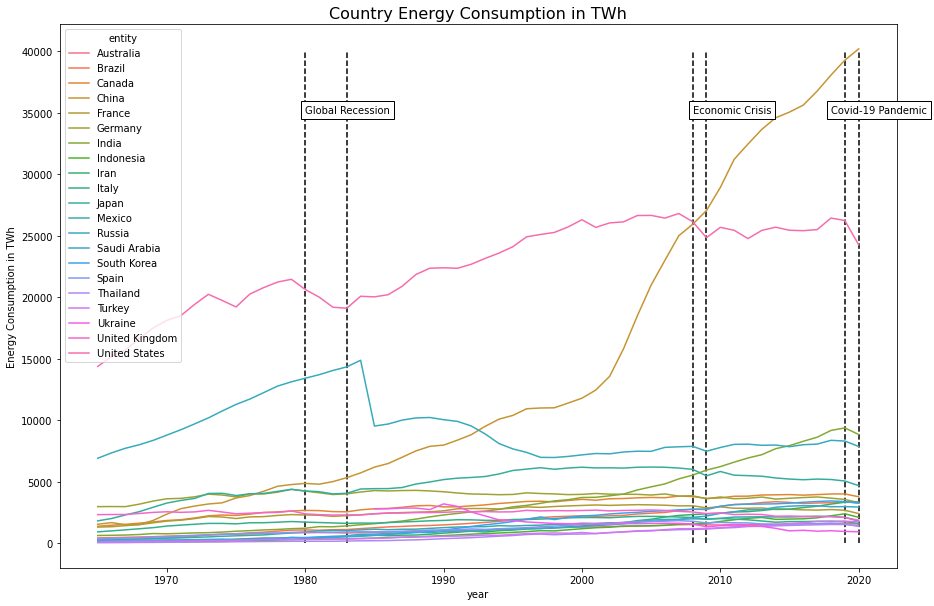

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
org_viz = sns.lineplot(x="year", y="energy_total", hue= 'entity',
                    data=temp_org_viz)
org_viz.set_title("Country Energy Consumption in TWh", size=16) # set title
org_viz.set_ylabel("Energy Consumption in TWh") # set y label
org_viz.text(1980, 35000, 'Global Recession', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
org_viz.text(2008, 35000, 'Economic Crisis', 
       bbox=dict(facecolor='white', alpha=1)) # insert text
org_viz.text(2018, 35000, 'Covid-19 Pandemic', bbox=dict(facecolor='white', alpha=1)) # insert text
plt.vlines(1980, 0, 40000, linestyles='dashed')
plt.vlines(1983, 0, 40000, linestyles='dashed')
plt.vlines(2020, 0, 40000, linestyles='dashed')
plt.vlines(2019, 0, 40000, linestyles='dashed')
plt.vlines(2009, 0, 40000, linestyles='dashed')
plt.vlines(2008, 0, 40000, linestyles='dashed')

China has the highest energy consumption and not affected by world economy condition. Countries in US and UK is affedted by world economy condition.

In [ ]:
temp_renew_continent =continent[[ 'entity', 'year', 'renewable_total']]

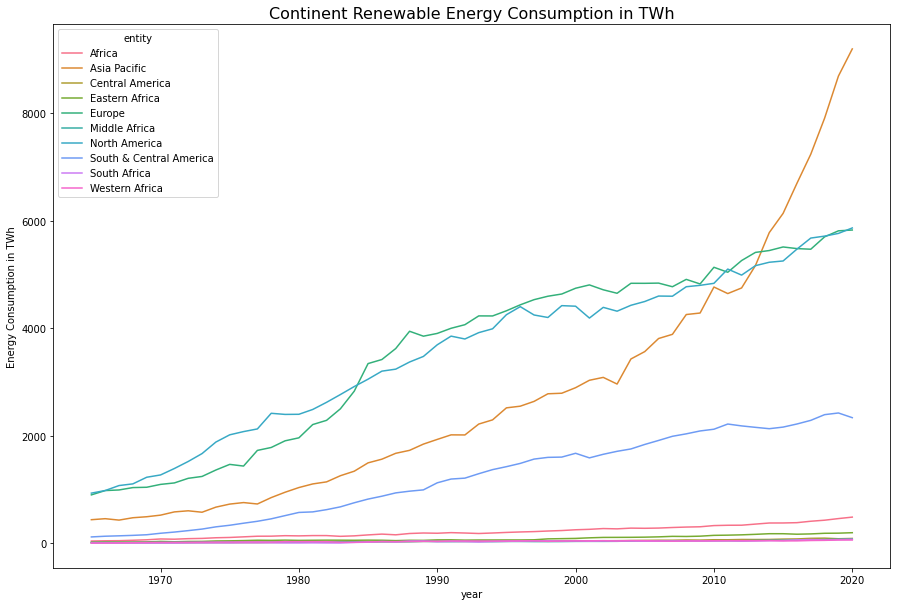

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
renew_viz = sns.lineplot(x="year", y="renewable_total", hue= 'entity',
                    data=temp_renew_continent)
renew_viz.set_title("Continent Renewable Energy Consumption in TWh", size=16) # set title
renew_viz.set_ylabel("Energy Consumption in TWh") # set y label
plt.show()

Asia Pasific has the highest value of renewable energy consumption. Then europe and north america.

In [ ]:
temp_renew_org =org[[ 'entity', 'year', 'renewable_total']]

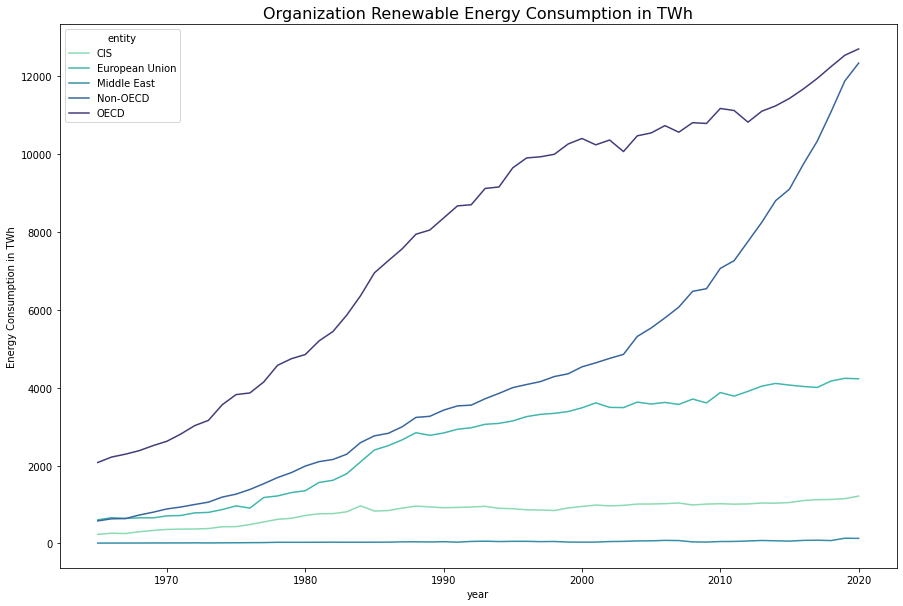

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
org_viz = sns.lineplot(x="year", y="renewable_total", hue= 'entity',
                    data=temp_renew_org)
org_viz.set_title("Organization Renewable Energy Consumption in TWh", size=16) # set title
org_viz.set_ylabel("Energy Consumption in TWh") # set y label
plt.show()

OECD has the highest renewable energy consumption.

In [ ]:
temp_renew_country = country[[ 'entity', 'year', 'renewable_total']]

In [ ]:
country_renew_filter = temp_renew_country['year'].isin([2020])

In [ ]:
temp_renew_country= temp_renew_country[country_filter]
temp_renew_country

,entity,year,renewable_total
55,Algeria,2020,1.623378
111,Argentina,2020,138.401131
167,Australia,2020,155.468685
223,Austria,2020,132.168802
259,Azerbaijan,2020,3.084174
...,...,...,...
3958,United States,2020,4359.180480
3994,Uzbekistan,2020,16.831879
4050,Venezuela,2020,78.104866
4106,Vietnam,2020,193.468097


In [ ]:
temp_renew_country.sort_values(by=['renewable_total'], ascending=False).head(21)

,entity,year,renewable_total
4162,World,2020,25043.893091
681,China,2020,6130.451370
3958,United States,2020,4359.180480
457,Brazil,2020,1492.653525
569,Canada,2020,1322.788200
1196,France,2020,1197.974574
3015,Russia,2020,1064.712358
1532,India,2020,864.077589
1252,Germany,2020,742.805675
1924,Japan,2020,556.049624


In [ ]:
temp_top_renew_energy = country['entity'].isin(['China', 'United States', 'Brazil', 'Canada', 'France','India', 'Russia', 'Japan', 'Germany', 'South Korea',  'United Kingdom', 'Spain', 'Sweden', 'Norway', 'Turkey', 'Italy', 'Ukraine',  'Vietnam', 'Mexico', 'Switzerland'])

In [ ]:
top_renew_energy = country [temp_top_renew_energy]
top_renew_energy

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
402,514,Brazil,1965,0.000000,70.875000,0.000000,0.0,0.0,0.000000,20.178050,177.730576,0.513422,269.297048,70.875000
403,515,Brazil,1966,0.000000,77.516667,0.000000,0.0,0.0,0.000000,21.864400,193.797599,0.600403,293.779068,77.516667
404,516,Brazil,1967,0.000000,81.080556,0.000000,0.0,0.0,0.000000,22.597090,199.991734,0.678716,304.348095,81.080556
405,517,Brazil,1968,0.000000,84.861111,0.000000,0.0,0.0,0.000000,22.236560,240.196156,0.717290,348.011117,84.861111
406,518,Brazil,1969,0.000000,90.811111,0.000000,0.0,0.0,0.000000,24.818420,263.567712,0.755965,379.953208,90.811111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4102,4886,Vietnam,2016,0.527604,166.095970,0.016778,0.0,0.0,0.068000,330.179364,258.548071,102.386500,857.822286,166.708351
4103,4887,Vietnam,2017,0.670730,221.905257,0.023427,0.0,0.0,0.076454,329.915188,270.643767,95.206900,918.441724,222.675868
4104,4888,Vietnam,2018,0.771047,209.978134,0.282074,0.0,0.0,0.076454,439.513982,288.082323,96.596500,1035.300513,211.107709
4105,4889,Vietnam,2019,0.001197,167.695530,10.195051,0.0,0.0,0.000439,574.244154,306.655864,98.526500,1157.318736,177.892218


In [ ]:
temp_renew_viz =top_renew_energy[[ 'entity', 'year', 'renewable_total']]

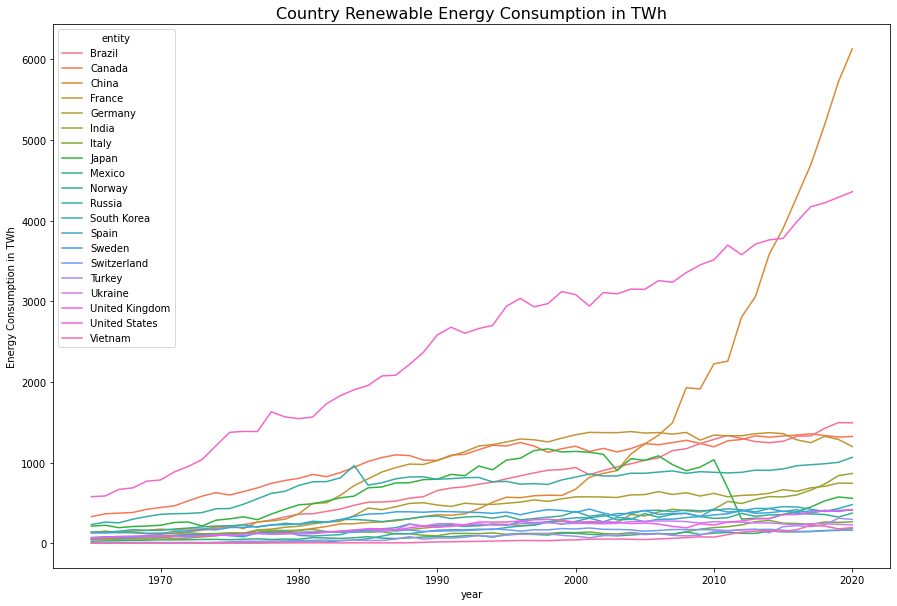

In [ ]:
# continent energy consumption visualization
fig, ax = plt.subplots(figsize=(15,10))
org_viz = sns.lineplot(x="year", y="renewable_total", hue= 'entity',
                    data=temp_renew_viz)
org_viz.set_title("Country Renewable Energy Consumption in TWh", size=16) # set title
org_viz.set_ylabel("Energy Consumption in TWh") # set y label
plt.show()

China and United States are the country which consump most of renewable energy.

### Modelling

### Simple Linier Regression

#### World Energy Consumption

In [ ]:
world.tail()

,index,year,energy_total,percent_change
51,4998,2016,152412.258105,1.344669
52,4999,2017,155171.703760,1.810514
53,5000,2018,159097.054682,2.529682
54,5001,2019,160551.824215,0.914391
55,5002,2020,153593.345591,-4.334101


In [ ]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split
from sklearn import linear_model


X = world['year'].to_numpy()
y = world['energy_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients total consumption: \n', regr.coef_)

# The intercept
print('Intercept total consumption: \n', regr.intercept_[0])

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

fittedline = (regr.coef_)*X + (regr.intercept_[0]) # generate prediction line (y=ax+b)
fittedline = fittedline.flatten() # column vetor to row vector (just for displaying data)

Coefficients total consumption: 
 [[2054.62121668]]
Intercept total consumption: 
 -3993548.2297531567
Residual sum of squares: 3292099669.83
Variance score: 0.99


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

mae = mean_absolute_error(y_test, regr.predict(X_test))
mape = mean_absolute_percentage_error(y_test, regr.predict(X_test))
rmse = mean_squared_error(y_test, regr.predict(X_test))**0.5
print ('MAE:', mae)
print ('MAPE:', mape)
print ('RMSE:', rmse)

MAE: 4040.9212110047374
MAPE: 0.03868109982985234
RMSE: 4501.132771395035


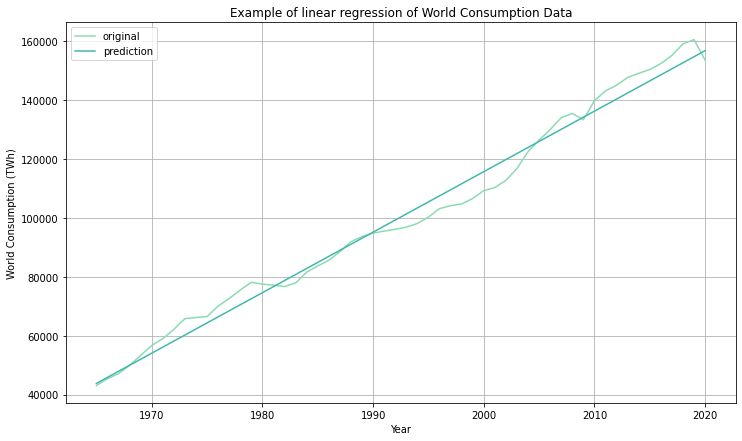

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(world['year'], world['energy_total'], label="original") # draw line (label is optional)
plt.plot(world['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("World Consumption (TWh)") # optional
plt.title("Example of linear regression of World Consumption Data") # optional
plt.legend(loc="best") # optional
fig.savefig("example_linear_regression.png") # save as image

#### Renewable Energy Generation

In [ ]:
renewable.head(5)

,index,year,renewable_total
0,4947,1965,2653.367588
1,4948,1966,2848.279138
2,4949,1967,2927.621754
3,4950,1968,3109.348301
4,4951,1969,3310.831944


In [ ]:
# as always, first thing is to split the data

X = renewable['year'].to_numpy()
y = renewable['renewable_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients renewable generation: \n', regr.coef_)

# The intercept
print('Intercept trenewable generation: \n', regr.intercept_[0])

# The mean square error
print("Residual sum of squares: %.2f" % np.mean((regr.predict(X_test) - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

fittedline = (regr.coef_)*X + (regr.intercept_[0]) # generate prediction line (y=ax+b)
fittedline = fittedline.flatten() # column vetor to row vector (just for displaying data)

Coefficients renewable generation: 
 [[370.80997815]]
Intercept trenewable generation: 
 -726820.4748541047
Residual sum of squares: 117594821.66
Variance score: 0.97


In [ ]:
import sklearn.metrics as metrics
mae = mean_absolute_error(y_test, regr.predict(X_test))
mape = mean_absolute_percentage_error(y_test, regr.predict(X_test))
rmse = mean_squared_error(y_test, regr.predict(X_test))**0.5
print ('MAE:', mae)
print ('MAPE:', mape)
print ('RMSE:', rmse)

MAE: 972.6329378142814
MAPE: 0.08567532132870648
RMSE: 1318.5432554145223


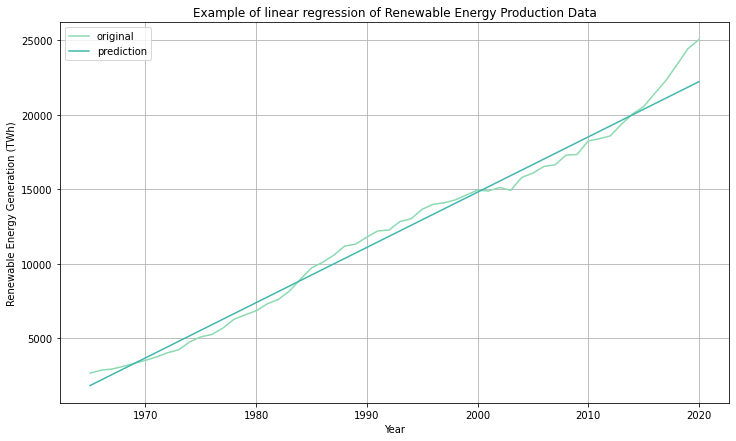

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(renewable['year'], renewable['renewable_total'], label="original") # draw line (label is optional)
plt.plot(renewable['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("Renewable Energy Generation (TWh)") # optional
plt.title("Example of linear regression of Renewable Energy Production Data") # optional
plt.legend(loc="best") # optional
plt.show()

### Ridge Regression

#### World Energy Consumption

In [ ]:
# as always, first thing is to split the data
X = world['year'].to_numpy()
y = world['energy_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20, 30)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=0),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30)},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002748,0.002413,0.000535,0.000105,0.000001,{'alpha': 1e-06},-4500.613520,-3796.030667,-4651.431119,-3396.140006,-3941.107900,-4057.064642,462.258195,1
1,0.000688,0.000138,0.000267,0.000025,0.00001,{'alpha': 1e-05},-4500.613518,-3796.030699,-4651.431103,-3396.139988,-3941.107905,-4057.064643,462.258192,2
2,0.000580,0.000025,0.000258,0.000007,0.0001,{'alpha': 0.0001},-4500.613500,-3796.031021,-4651.430952,-3396.139811,-3941.107951,-4057.064647,462.258161,3
3,0.000560,0.000011,0.000250,0.000005,0.001,{'alpha': 0.001},-4500.613314,-3796.034243,-4651.429434,-3396.138034,-3941.108419,-4057.064689,462.257856,4
4,0.000551,0.000008,0.000260,0.000016,0.01,{'alpha': 0.01},-4500.611455,-3796.066461,-4651.414257,-3396.120264,-3941.113095,-4057.065107,462.254805,5
5,0.000554,0.000007,0.000252,0.000008,0.1,{'alpha': 0.1},-4500.592879,-3796.388642,-4651.262512,-3395.942590,-3941.159875,-4057.069300,462.224332,6
6,0.000623,0.000121,0.000348,0.000179,1,{'alpha': 1},-4500.408072,-3799.610650,-4649.747131,-3394.167946,-3941.629599,-4057.112680,461.923317,7
7,0.001021,0.000267,0.000438,0.000102,5,{'alpha': 5},-4499.607655,-3813.934991,-4643.057601,-3386.326793,-3943.759542,-4057.337316,460.667131,8
8,0.000741,0.000284,0.000295,0.000050,10,{'alpha': 10},-4498.655135,-3831.849955,-4634.800211,-3376.631596,-3946.518656,-4057.691111,459.284180,9
9,0.000581,0.000023,0.000260,0.000008,20,{'alpha': 20},-4496.909505,-3867.709543,-4618.634243,-3357.597141,-3952.356668,-4058.641420,457.140107,10


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-4057.064642,1
1,{'alpha': 1e-05},-4057.064643,2
2,{'alpha': 0.0001},-4057.064647,3
3,{'alpha': 0.001},-4057.064689,4
4,{'alpha': 0.01},-4057.065107,5
5,{'alpha': 0.1},-4057.069300,6
6,{'alpha': 1},-4057.112680,7
7,{'alpha': 5},-4057.337316,8
8,{'alpha': 10},-4057.691111,9
9,{'alpha': 20},-4058.641420,10


In [ ]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=1e-06, random_state=0)

In [ ]:
ridge_reg_gridcv.best_estimator_.coef_

array([[2054.62121647]])

In [ ]:
# the intercept of the best estimator
ridge_reg_gridcv.best_estimator_.intercept_

array([-3993548.22933293])

In [ ]:
print('Coefficients world consumption : \n', ridge_reg_gridcv.best_estimator_.coef_)

# The intercept
print('Intercept world consumption: \n', ridge_reg_gridcv.best_estimator_.intercept_)


fittedline1 = (ridge_reg_gridcv.best_estimator_.coef_)*X + (ridge_reg_gridcv.best_estimator_.intercept_) # generate prediction line (y=ax+b)
fittedline = fittedline1.flatten() # column vetor to row vector (just for displaying data)

Coefficients world consumption : 
 [[2054.62121647]]
Intercept world consumption: 
 [-3993548.22933293]


In [ ]:
y_true = y_test
y_pred = (ridge_reg_gridcv.best_estimator_.coef_)*X_test + (ridge_reg_gridcv.best_estimator_.intercept_)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Ridge Linier Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Ridge Linier Model:
MAE: 4040.921211327712
MAPE: 0.03868109983041363
RMSE: 4501.1327717306785
R-Squared: 0.9877565210080925


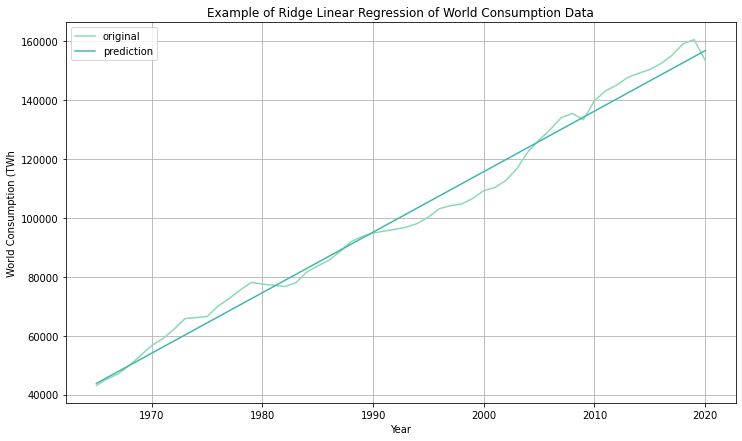

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(world['year'], world['energy_total'], label="original") # draw line (label is optional)
plt.plot(world['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("World Consumption (TWh") # optional
plt.title("Example of Ridge Linear Regression of World Consumption Data") # optional
plt.legend(loc="best") # optional
fig.savefig("example_linear_regression.png") # save as image

#### Renewable Energy Consumption

In [ ]:
# as always, first thing is to split the data
X = renewable['year'].to_numpy()
y = renewable['renewable_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Ridge

ridge_reg = Ridge(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
}

# the tuning
ridge_reg_gridcv = GridSearchCV(ridge_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
ridge_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 60, 70, 80, 90, 100)},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(ridge_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000992,0.000400,0.000407,0.000177,0.000001,{'alpha': 1e-06},-517.854796,-593.774105,-654.940387,-531.058577,-524.173734,-564.360320,52.833041,12
1,0.000579,0.000022,0.000258,0.000022,0.00001,{'alpha': 1e-05},-517.854793,-593.774101,-654.940391,-531.058576,-524.173736,-564.360319,52.833042,11
2,0.000549,0.000012,0.000255,0.000014,0.0001,{'alpha': 0.0001},-517.854768,-593.774059,-654.940433,-531.058570,-524.173759,-564.360318,52.833053,10
3,0.000539,0.000010,0.000255,0.000012,0.001,{'alpha': 0.001},-517.854516,-593.773648,-654.940853,-531.058506,-524.173988,-564.360302,52.833169,9
4,0.000547,0.000011,0.000251,0.000012,0.01,{'alpha': 0.01},-517.851995,-593.769537,-654.945045,-531.057870,-524.176281,-564.360146,52.834324,8
5,0.000550,0.000008,0.000247,0.000010,0.1,{'alpha': 0.1},-517.826785,-593.728429,-654.986971,-531.051508,-524.199218,-564.358582,52.845883,7
6,0.000556,0.000033,0.000294,0.000080,1,{'alpha': 1},-517.574915,-593.317715,-655.406499,-530.988378,-524.428988,-564.343299,52.962266,6
7,0.000667,0.000124,0.000391,0.000092,5,{'alpha': 5},-516.460583,-591.500501,-657.276791,-530.718583,-525.459071,-564.283106,53.496708,4
8,0.000804,0.000188,0.000370,0.000120,10,{'alpha': 10},-515.079383,-589.247838,-659.627652,-530.406053,-526.766913,-564.225568,54.203191,3
9,0.000666,0.000085,0.000316,0.000046,20,{'alpha': 20},-512.356213,-584.805855,-664.371736,-529.863145,-529.449033,-564.169196,55.737601,1


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(ridge_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-564.360320,12
1,{'alpha': 1e-05},-564.360319,11
2,{'alpha': 0.0001},-564.360318,10
3,{'alpha': 0.001},-564.360302,9
4,{'alpha': 0.01},-564.360146,8
5,{'alpha': 0.1},-564.358582,7
6,{'alpha': 1},-564.343299,6
7,{'alpha': 5},-564.283106,4
8,{'alpha': 10},-564.225568,3
9,{'alpha': 20},-564.169196,1


In [ ]:
# the best model
ridge_reg_gridcv.best_estimator_

Ridge(alpha=20, random_state=42)

In [ ]:
ridge_reg_gridcv.best_estimator_.intercept_

array([-725306.76801097])

In [ ]:
print('Coefficients renewable generation : \n', ridge_reg_gridcv.best_estimator_.coef_)

# The intercept
print('Coefficients renewable generation: \n', ridge_reg_gridcv.best_estimator_.intercept_)


fittedline = (ridge_reg_gridcv.best_estimator_.coef_)*X + (ridge_reg_gridcv.best_estimator_.intercept_) # generate prediction line (y=ax+b)
fittedline = fittedline.flatten() # column vetor to row vector (just for displaying data)

Coefficients renewable generation : 
 [[370.04985967]]
Coefficients renewable generation: 
 [-725306.76801097]


In [ ]:
y_true = y_test
y_pred = (ridge_reg_gridcv.best_estimator_.coef_)*X_test + (ridge_reg_gridcv.best_estimator_.intercept_)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Ridge Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Ridge Model:
MAE: 979.5488642505542
MAPE: 0.08601418509642077
RMSE: 1327.4182736359692
R-Squared: 0.9724844867227023


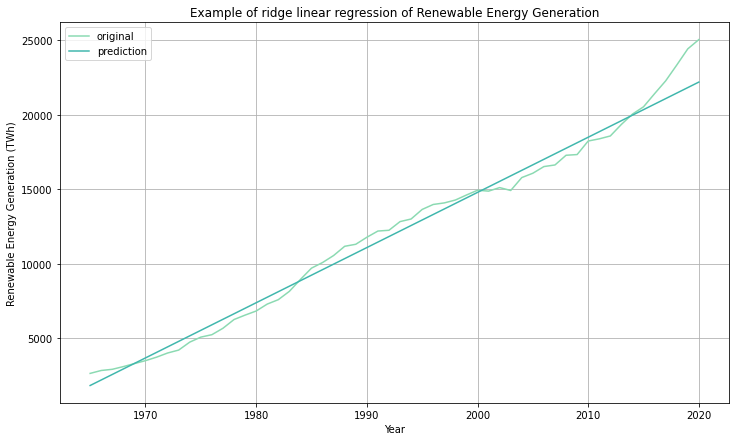

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(renewable['year'], renewable['renewable_total'], label="original") # draw line (label is optional)
plt.plot(renewable['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("Renewable Energy Generation (TWh)") # optional
plt.title("Example of ridge linear regression of Renewable Energy Generation") # optional
plt.legend(loc="best") # optional
fig.savefig("example_linear_regression.png") # save as image

### Lasso Regression

#### World Energy Consumption

In [ ]:
# as always, first thing is to split the data
X = world['year'].to_numpy()
y = world['energy_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20, 30)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30)},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(lasso_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002032,0.001174,0.000689,0.000365,0.000001,{'alpha': 1e-06},-4500.613520,-3796.030663,-4651.431120,-3396.140008,-3941.107899,-4057.064642,462.258195,1
1,0.001140,0.000252,0.000380,0.000075,0.00001,{'alpha': 1e-05},-4500.613520,-3796.030664,-4651.431120,-3396.140008,-3941.107899,-4057.064642,462.258195,2
2,0.000799,0.000019,0.000281,0.000006,0.0001,{'alpha': 0.0001},-4500.613520,-3796.030669,-4651.431117,-3396.140005,-3941.107900,-4057.064642,462.258194,3
3,0.000767,0.000006,0.000299,0.000018,0.001,{'alpha': 0.001},-4500.613517,-3796.030726,-4651.431092,-3396.139975,-3941.107908,-4057.064644,462.258189,4
4,0.000777,0.000018,0.000283,0.000008,0.01,{'alpha': 0.01},-4500.613485,-3796.031287,-4651.430837,-3396.139675,-3941.107991,-4057.064655,462.258135,5
5,0.000764,0.000009,0.000287,0.000008,0.1,{'alpha': 0.1},-4500.613169,-3796.036897,-4651.428283,-3396.136680,-3941.108812,-4057.064768,462.257600,6
6,0.000770,0.000010,0.000288,0.000006,1,{'alpha': 1},-4500.610006,-3796.092997,-4651.402751,-3396.106728,-3941.117028,-4057.065902,462.252245,7
7,0.000810,0.000034,0.000286,0.000008,5,{'alpha': 5},-4500.595956,-3796.342339,-4651.289288,-3395.973618,-3941.153557,-4057.070952,462.228471,8
8,0.000776,0.000010,0.000289,0.000011,10,{'alpha': 10},-4500.578407,-3796.654025,-4651.147486,-3395.807257,-3941.199250,-4057.077285,462.198808,9
9,0.000781,0.000006,0.000284,0.000008,20,{'alpha': 20},-4500.543355,-3797.277428,-4650.863970,-3395.474625,-3941.290737,-4057.090023,462.139665,10


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-4057.064642,1
1,{'alpha': 1e-05},-4057.064642,2
2,{'alpha': 0.0001},-4057.064642,3
3,{'alpha': 0.001},-4057.064644,4
4,{'alpha': 0.01},-4057.064655,5
5,{'alpha': 0.1},-4057.064768,6
6,{'alpha': 1},-4057.065902,7
7,{'alpha': 5},-4057.070952,8
8,{'alpha': 10},-4057.077285,9
9,{'alpha': 20},-4057.090023,10


In [ ]:
# the best model
lasso_reg_gridcv.best_estimator_

Lasso(alpha=1e-06, random_state=42)

In [ ]:
lasso_reg_gridcv.best_estimator_.coef_

array([2054.62121667])

In [ ]:
print('Coefficients world consumption : \n', lasso_reg_gridcv.best_estimator_.coef_)

# The intercept
print('Intercept world consumption: \n', lasso_reg_gridcv.best_estimator_.intercept_)


fittedline = (lasso_reg_gridcv.best_estimator_.coef_)*X + (lasso_reg_gridcv.best_estimator_.intercept_) # generate prediction line (y=ax+b)
fittedline = fittedline.flatten() # column vetor to row vector (just for displaying data)

Coefficients world consumption : 
 [2054.62121667]
Intercept world consumption: 
 [-3993548.22974416]


In [ ]:
y_true = y_test
y_pred = (lasso_reg_gridcv.best_estimator_.coef_)*X_test + (lasso_reg_gridcv.best_estimator_.intercept_)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Lasso Regression Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Lasso Regression Model:
MAE: 4040.9212110116446
MAPE: 0.038681099829864764
RMSE: 4501.132771402146
R-Squared: 0.9877565210098798


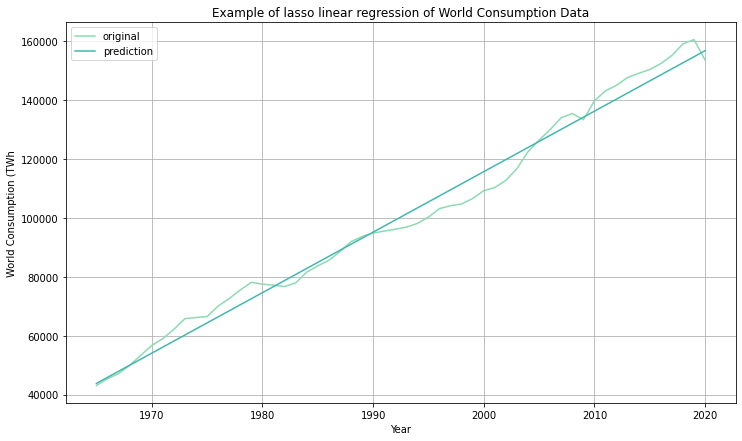

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(world['year'], world['energy_total'], label="original") # draw line (label is optional)
plt.plot(world['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("World Consumption (TWh") # optional
plt.title("Example of lasso linear regression of World Consumption Data") # optional
plt.legend(loc="best") # optional
fig.savefig("example_linear_regression.png") # save as image

#### Renewable Energy Consumption

In [ ]:
# as always, first thing is to split the data
X = renewable['year'].to_numpy()
y = renewable['renewable_total'].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=6)
X_train= X_train.reshape(-1, 1)
y_train= y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

from sklearn.linear_model import Lasso

lasso_reg = Lasso(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# hyperparameter values we want to tune
parameters = {
    'alpha': (0.000001,0.00001,0.0001,0.001, 
              0.01, 0.1, 1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100)
}

# the tuning
lasso_reg_gridcv = GridSearchCV(lasso_reg, parameters, cv=5, 
                                scoring='neg_root_mean_squared_error')
lasso_reg_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': (1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 5,
                                   10, 20, 30, 40, 50, 60, 70, 80, 90, 100)},
             scoring='neg_root_mean_squared_error')

In [ ]:
pd.DataFrame(lasso_reg_gridcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001472,0.000099,0.000550,0.000054,0.000001,{'alpha': 1e-06},-517.854796,-593.774105,-654.940387,-531.058577,-524.173733,-564.360320,52.833040,18
1,0.001013,0.000212,0.000336,0.000076,0.00001,{'alpha': 1e-05},-517.854796,-593.774105,-654.940387,-531.058577,-524.173734,-564.360320,52.833041,17
2,0.001051,0.000252,0.000473,0.000204,0.0001,{'alpha': 0.0001},-517.854793,-593.774101,-654.940391,-531.058576,-524.173736,-564.360320,52.833042,16
3,0.000982,0.000177,0.000346,0.000058,0.001,{'alpha': 0.001},-517.854770,-593.774062,-654.940431,-531.058570,-524.173758,-564.360318,52.833053,15
4,0.001396,0.000967,0.000504,0.000296,0.01,{'alpha': 0.01},-517.854534,-593.773679,-654.940833,-531.058510,-524.173982,-564.360308,52.833163,14
5,0.001209,0.000509,0.000363,0.000070,0.1,{'alpha': 0.1},-517.852173,-593.769846,-654.944853,-531.057910,-524.176223,-564.360201,52.834265,13
6,0.000796,0.000019,0.000304,0.000008,1,{'alpha': 1},-517.828572,-593.731521,-654.985055,-531.051915,-524.198633,-564.359139,52.845292,12
7,0.000789,0.000009,0.000299,0.000021,5,{'alpha': 5},-517.723716,-593.561249,-655.163792,-531.025364,-524.298327,-564.354489,52.894461,11
8,0.000789,0.000014,0.000316,0.000036,10,{'alpha': 10},-517.592735,-593.348547,-655.387361,-530.992391,-524.423154,-564.348838,52.956287,10
9,0.000836,0.000047,0.000315,0.000038,20,{'alpha': 20},-517.331070,-592.923609,-655.834992,-530.927166,-524.673506,-564.338069,53.081153,9


In [ ]:
# only show the most important columns
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result = pd.DataFrame(lasso_reg_gridcv.cv_results_)
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'alpha': 1e-06},-564.360320,18
1,{'alpha': 1e-05},-564.360320,17
2,{'alpha': 0.0001},-564.360320,16
3,{'alpha': 0.001},-564.360318,15
4,{'alpha': 0.01},-564.360308,14
5,{'alpha': 0.1},-564.360201,13
6,{'alpha': 1},-564.359139,12
7,{'alpha': 5},-564.354489,11
8,{'alpha': 10},-564.348838,10
9,{'alpha': 20},-564.338069,9


In [ ]:
# the best model
lasso_reg_gridcv.best_estimator_

Lasso(alpha=100, random_state=42)

In [ ]:
lasso_reg_gridcv.best_estimator_.coef_

array([370.3580767])

In [ ]:
print('Coefficients world consumption : \n', lasso_reg_gridcv.best_estimator_.coef_)

# The intercept
print('Intercept world consumption: \n', lasso_reg_gridcv.best_estimator_.intercept_)


fittedline = (lasso_reg_gridcv.best_estimator_.coef_)*X + (lasso_reg_gridcv.best_estimator_.intercept_) # generate prediction line (y=ax+b)
fittedline = fittedline.flatten() # column vetor to row vector (just for displaying data)

Coefficients world consumption : 
 [370.3580767]
Intercept world consumption: 
 [-725920.55421696]


In [ ]:
y_true = y_test
y_pred = (lasso_reg_gridcv.best_estimator_.coef_)*X_test + (lasso_reg_gridcv.best_estimator_.intercept_)

import sklearn.metrics as metrics
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Lasso Regression Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Lasso Regression Model:
MAE: 976.7445562252132
MAPE: 0.08587678074545581
MSE: 1752459.703545686
RMSE: 1323.805009639141
R-Squared: 0.9726340786072587


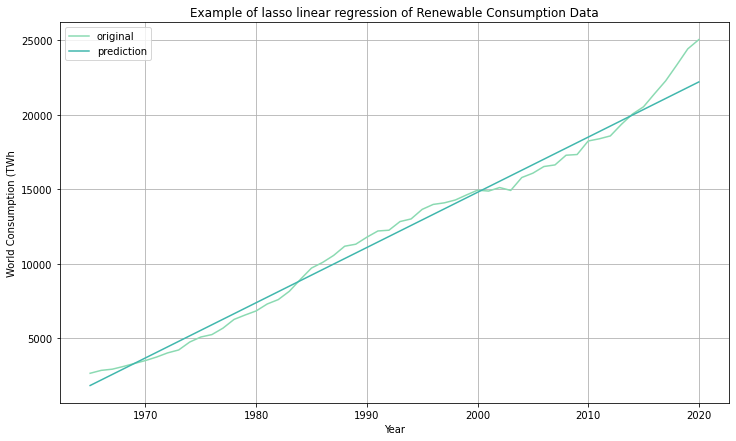

In [ ]:
## Make graph of the results
fig = plt.figure(figsize=(12, 7)) # make canvas of picture. figsize is optional
plt.plot(renewable['year'], renewable['renewable_total'], label="original") # draw line (label is optional)
plt.plot(renewable['year'], fittedline, label="prediction") # add one more line (label is optional)
plt.grid() # optional
plt.xlabel("Year") # optional
plt.ylabel("World Consumption (TWh") # optional
plt.title("Example of lasso linear regression of Renewable Consumption Data") # optional
plt.legend(loc="best") # optional
fig.savefig("example_linear_regression.png") # save as image

### Time Series Analysis

In [ ]:
! pip install pmdarima 
# install pmdarima for ARIMA time series regression

     |████████████████████████████████| 1.4 MB 5.0 MB/s 
     |████████████████████████████████| 9.8 MB 46.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


#### World Energy Consumption

In [ ]:
world.tail()

,index,year,energy_total,percent_change
51,4998,2016,152412.258105,1.344669
52,4999,2017,155171.703760,1.810514
53,5000,2018,159097.054682,2.529682
54,5001,2019,160551.824215,0.914391
55,5002,2020,153593.345591,-4.334101


In [ ]:
df = world[['year','energy_total']]
df.head(5)

,year,energy_total
0,1965,43074.908674
1,1966,45375.570872
2,1967,47081.525985
3,1968,49929.965537
4,1969,53275.433074


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          56 non-null     int64  
 1   energy_total  56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [ ]:
df.year = pd.to_datetime(df["year"], format="%Y")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df.set_index('year',inplace=True)

In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

Text(0.5, 0.98, 'Time Series Decomposition')

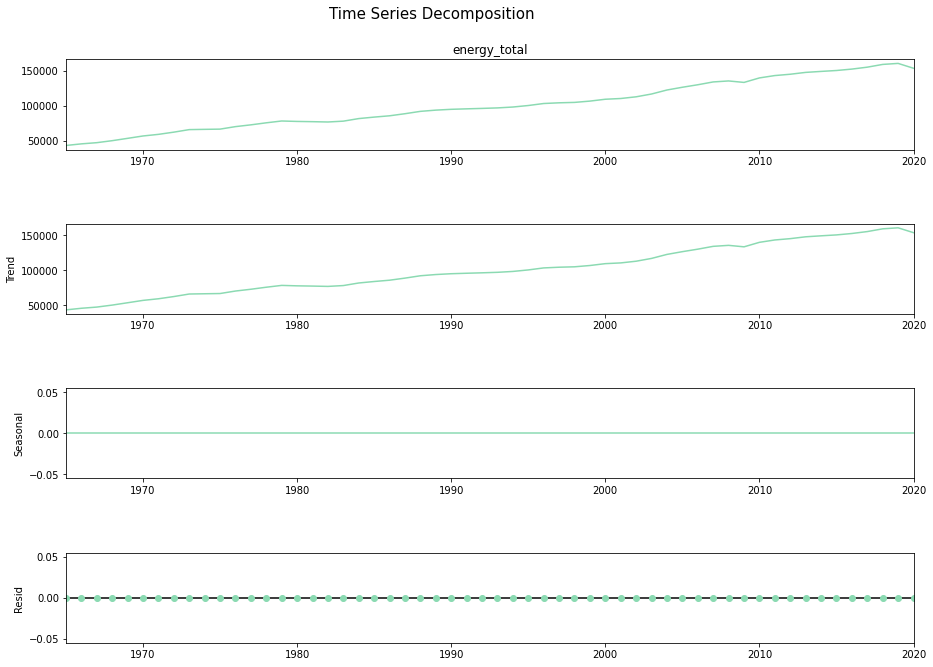

In [ ]:
## break down the data into three portions, trend, seasonality, and random residual components
## use the additive model
result=seasonal_decompose(df['energy_total'],model='additive')

## create time series decomposition to see the trend and seasonality
fig = result.plot()
fig.set_size_inches(15,10)
fig.suptitle("Time Series Decomposition", fontsize = 15)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Testing for stationarity using ADF

def stationarity_test(total_energy_consumption):
    # Calculating rolling mean and rolling standard deviation:
    rolling_mean = total_energy_consumption.rolling(12).mean()
    rolling_std_dev = total_energy_consumption.rolling(12).std()
  
    # Plotting the statistics:
    plt.figure(figsize=(24,6))
    plt.plot(rolling_mean, color='blue', label='Rolling Mean')
    plt.plot(rolling_std_dev, color='green', label = 'Rolling Std Dev')
    plt.plot(total_energy_consumption, color='black',label='Original Time Series')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    
    print("ADF Test:")
    adf_test = adfuller(total_energy_consumption,autolag='AIC')
    print('ADF Statistic: %f' % adf_test[0])
    print('p-value: %f' % adf_test[1])
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print('\t%s: %.3f' % (key, value))
    print(f'Result: The series is {"not " if adf_test[1] > 0.05 else ""}stationary')

ADF Test:
ADF Statistic: -0.953322
p-value: 0.769906
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
Result: The series is not stationary


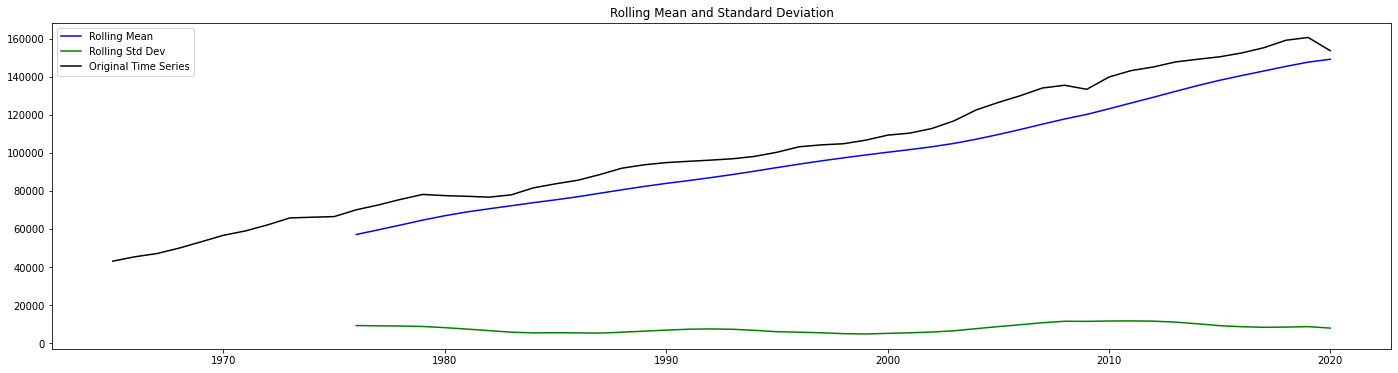

In [ ]:
stationarity_test(df['energy_total'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


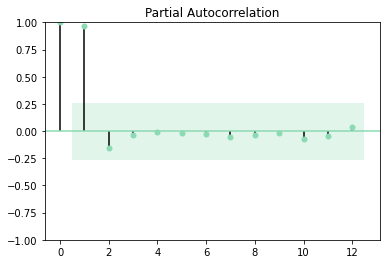

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['energy_total'].dropna(), lags=12)

ADF Test:
ADF Statistic: -1.791855
p-value: 0.384513
Critical Values:
	1%: -3.593
	5%: -2.932
	10%: -2.604
Result: The series is not stationary


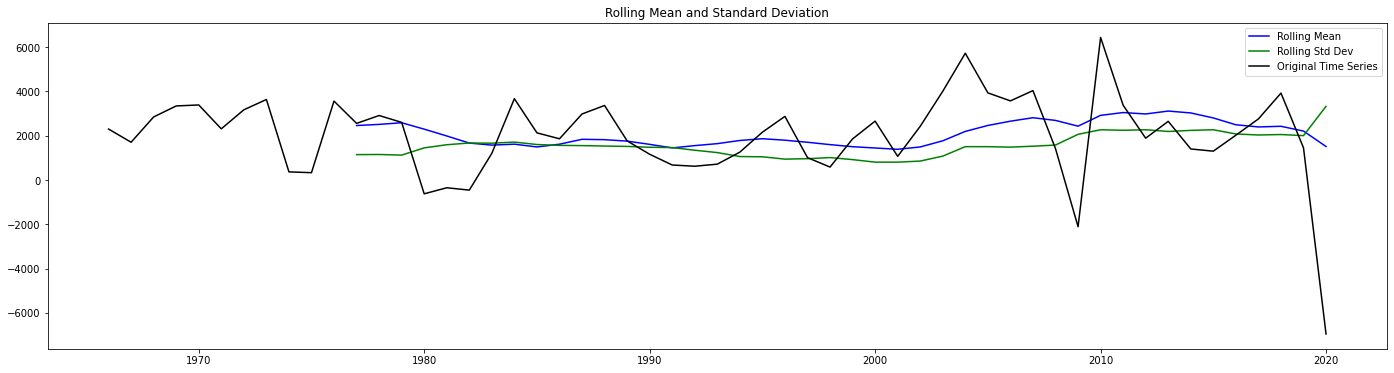

In [ ]:
stationarity_test(df['energy_total'].diff().dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


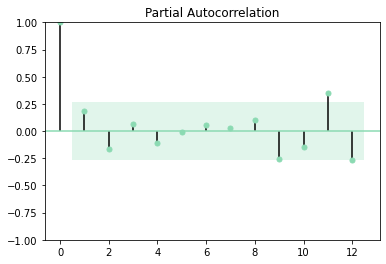

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['energy_total'].diff().dropna(), lags=12)

In [ ]:
# log transformation
df['energy_total_log'] = np.log(df['energy_total'])
# differencing after log transformation
df['energy_total_log_diff'] = df['energy_total_log'].diff(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


ADF Test:
ADF Statistic: -3.485231
p-value: 0.008375
Critical Values:
	1%: -3.558
	5%: -2.917
	10%: -2.596
Result: The series is stationary


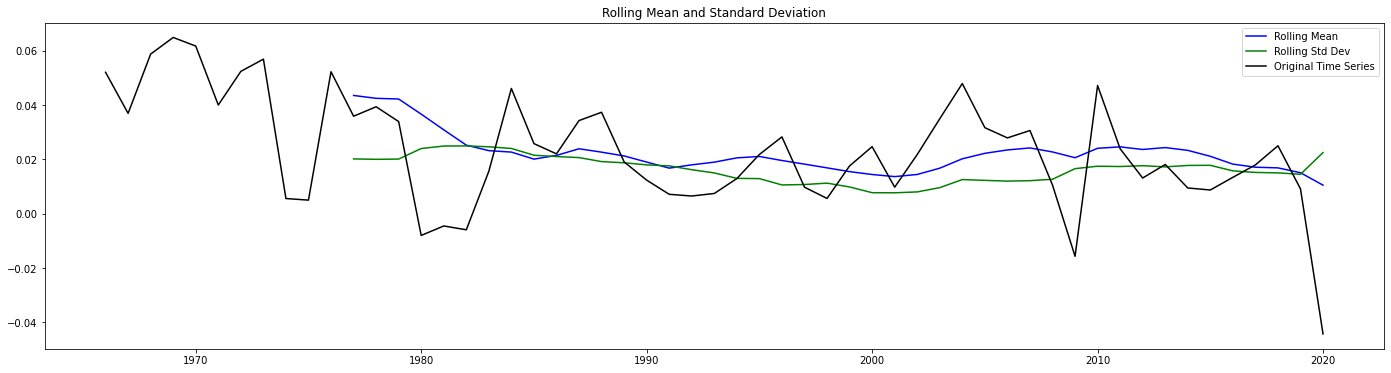

In [ ]:
stationarity_test(df['energy_total_log_diff'].dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


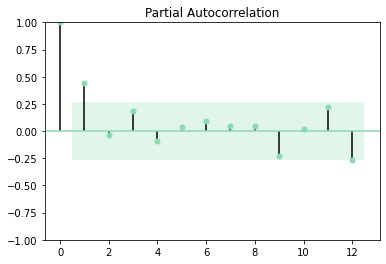

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['energy_total_log_diff'].dropna(), lags=12)

In [ ]:
train_df = df['energy_total'].loc[:"2009-01-01"]
test_df = df['energy_total'].loc["2010-01-01":]

print("Training Set Shape - ", train_df.shape)
print("Testing Set Shape - ", test_df.shape)

Training Set Shape -  (45,)
Testing Set Shape -  (11,)


In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing
import sklearn.metrics as metrics
from numpy import sqrt 

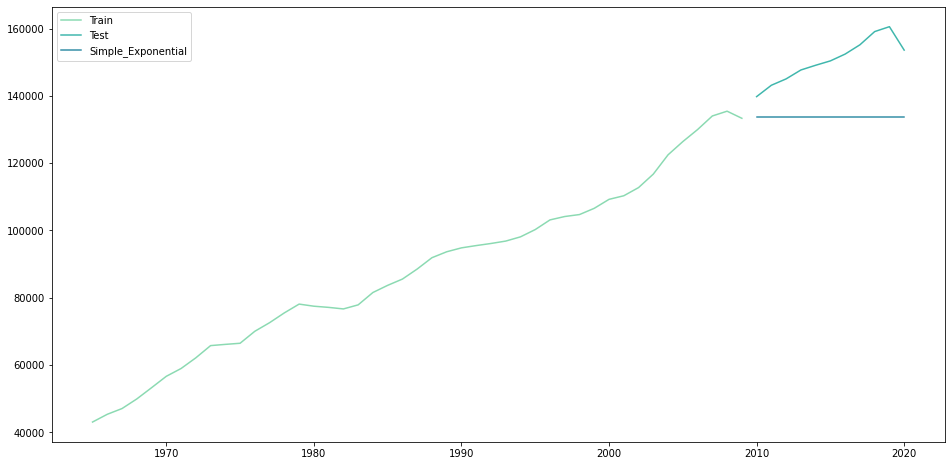

Smoothing Level :- 0.75


In [ ]:
# Simple Exponential Smoothing Method
pred_values = test_df.copy()
pred_values = pd.DataFrame(pred_values)

Simple_Exponential_df = pd.DataFrame(columns = ['RMS','Smoothing Level'])
from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
  fit_sim_exp = SimpleExpSmoothing(np.asarray(train_df)).fit(smoothing_level = i[0])
  pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_df))

  rms = round(sqrt(mean_squared_error(test_df.values, pred_values.Simple_Exponential)),3)
  Simple_Exponential_df = Simple_Exponential_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0]} , ignore_index=True)

opt_values = Simple_Exponential_df.loc[Simple_Exponential_df['RMS'] == min(Simple_Exponential_df['RMS']),['Smoothing Level']].values


# Using optimised values from the lists.
fit_sim_exp = SimpleExpSmoothing(np.asarray(train_df)).fit(smoothing_level = opt_values[0][0])
pred_values['Simple_Exponential'] = fit_sim_exp.forecast(len(test_df))

plt.figure(figsize=(16,8))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(pred_values['Simple_Exponential'], label='Simple_Exponential')
plt.legend(loc='best')
plt.show()


print("Smoothing Level :- "+str(round(opt_values[0][0],3)))

In [ ]:
y_true = test_df.values
y_pred =  pred_values.Simple_Exponential
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Simple Exponential Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Simple Exponential Model:
MAE: 16853.851587644545
MAPE: 0.11045592786770939
RMSE: 17948.114379130744
R-Squared: -7.458867983492198


In [ ]:
from statsmodels.tsa.api import Holt

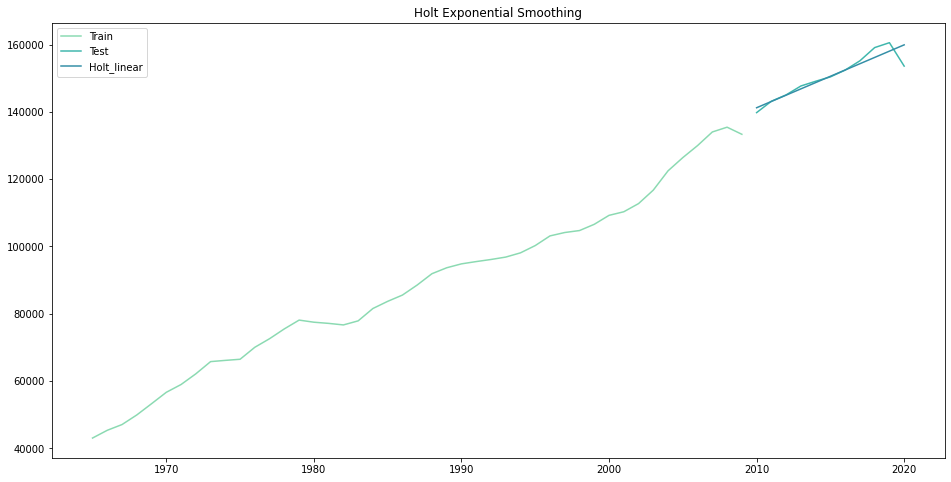

Smoothing Level :- 0.3 & Smoothing Slope :- 0.85


In [ ]:
# Holt's Exponential Smoothing Method
holt_linear_df = pd.DataFrame(columns = ['RMS','Smoothing Level','Smoothing Slope'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 2)
for i in list(perm):
  fit_holt = Holt(np.asarray(train_df)).fit(smoothing_level = i[0],smoothing_trend=i[1])
  pred_values['Holt_linear'] = fit_holt.forecast(len(test_df))

  rms = round(sqrt(mean_squared_error(test_df.values, pred_values.Holt_linear)),3)
  holt_linear_df = holt_linear_df.append(other = {'RMS' : rms , 'Smoothing Level' : i[0], 'Smoothing Slope':i[1]} , ignore_index=True)

opt_values = holt_linear_df.loc[holt_linear_df['RMS'] == min(holt_linear_df['RMS']),['Smoothing Level','Smoothing Slope']].values


# Using optimised values from the lists.
fit_holt = Holt(np.asarray(train_df)).fit(smoothing_level = opt_values[0][0],smoothing_trend=opt_values[0][1])
pred_values['Holt_linear'] = fit_holt.forecast(len(test_df))
pred_values.index = test_df.index

plt.figure(figsize=(16,8))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(pred_values['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

rms_holt_exp = sqrt(mean_squared_error(test_df.values, pred_values.Holt_linear))
print("Smoothing Level :- "+str(round(opt_values[0][0],3)) + " & Smoothing Slope :- "+str(round(opt_values[0][1],3)))

In [ ]:
y_true = test_df.values
y_pred =  pred_values.Holt_linear
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Holt Exponential Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Holt Exponential Model:
MAE: 1423.591457612474
MAPE: 0.009258938683930953
RMSE: 2307.102195531802
R-Squared: 0.8602318377239422


In [ ]:
from pmdarima import auto_arima

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=756.105, Time=0.15 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=753.093, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=754.935, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=755.017, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=751.303, Time=0.01 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.247 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   45
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -374.651
Date:                Sun, 22 May 2022   AIC                            751.303
Time:                        00:56:43   BIC                            753.064
Sample:                             0   HQIC                           751.952
                                 - 45                                         
Co

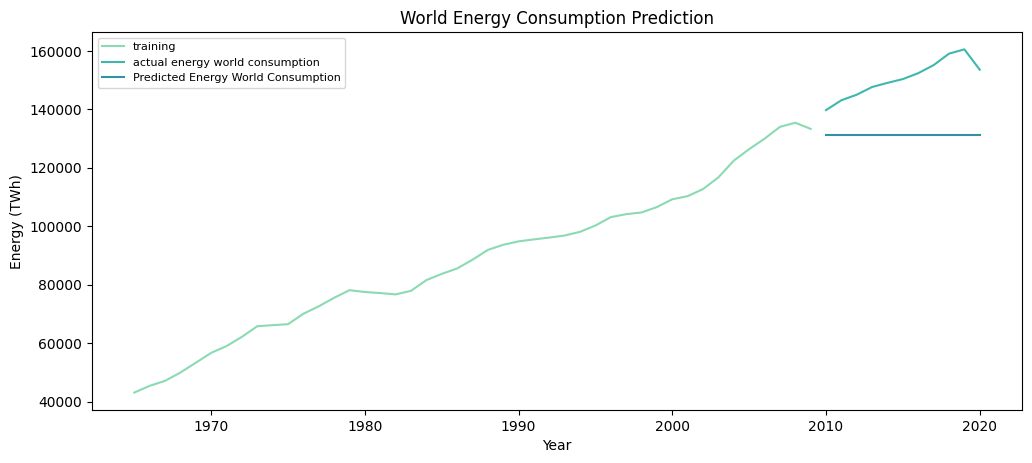

Auto-Arima RMSE :- 20283.827


In [ ]:
# Auto ARIMA Method
arima_model = auto_arima(train_df,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train_df) 
print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict(len(test_df), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=test_df.index)

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual energy world consumption')
plt.plot(fcv_series,label='Predicted Energy World Consumption')
plt.title('World Energy Consumption Prediction')
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = sqrt(mean_squared_error(test_df.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

In [ ]:
y_true = test_df.values
y_pred =  fcv_series
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Holt Exponential Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Holt Exponential Model:
MAE: 19322.296036239393
MAPE: 0.12688080674881808
RMSE: 20283.826575379797
R-Squared: -9.803746054774342


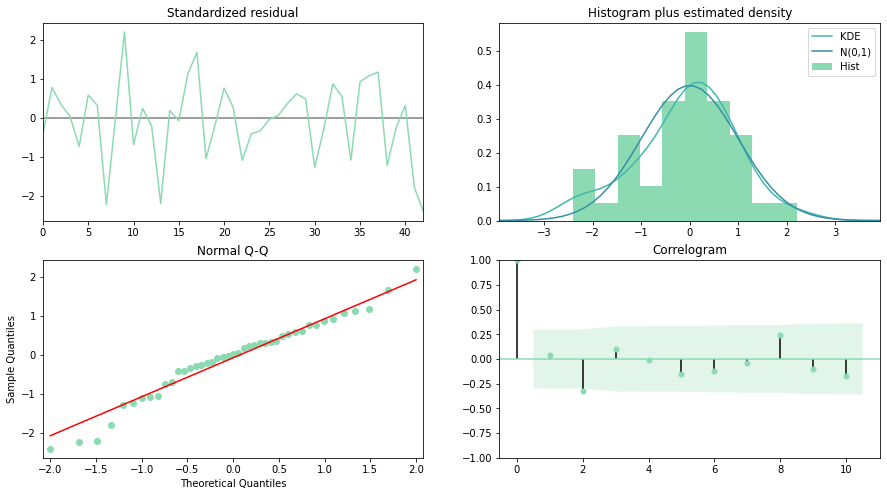

In [ ]:
# Plotting the diagnostics of the fiited model.
arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

#### Model Evaluation

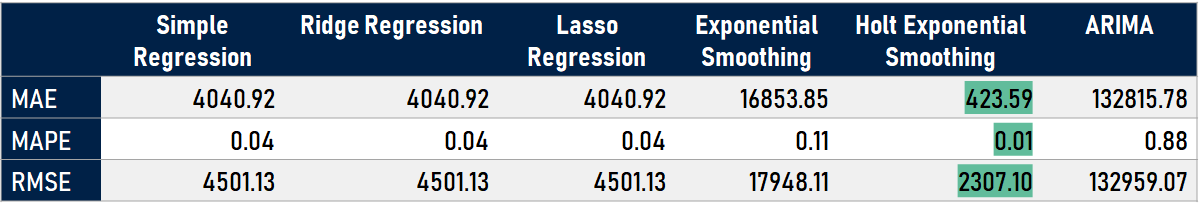

Holt Exponential Smoothing has the lowest MAE, MAPE, and RMSE. Therefore Holt Exponential Smoothing is choosen for prediction.

#### Prediction World Energy Consumption

In [ ]:
energy_total_pred = fit_holt.forecast(len(test_df)+30)
energy_total_pred = pd.DataFrame(energy_total_pred, columns = ['energy_total_prediction'])

In [ ]:
energy_total_pred ['year'] = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032
                              , 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
                              2046, 2047, 2048, 2049, 2050, 2051]

In [ ]:
energy_total_pred

,energy_total_prediction,year
0,141220.221657,2011
1,143089.147181,2012
2,144958.072706,2013
3,146826.998230,2014
4,148695.923755,2015
5,150564.849280,2016
6,152433.774804,2017
7,154302.700329,2018
8,156171.625853,2019
9,158040.551378,2020


In [ ]:
energy_total_pred.year = pd.to_datetime(energy_total_pred["year"], format="%Y")

In [ ]:
energy_total_pred.set_index('year',inplace=True)
energy_total_pred

,energy_total_prediction
year,
2011-01-01,141220.221657
2012-01-01,143089.147181
2013-01-01,144958.072706
2014-01-01,146826.998230
2015-01-01,148695.923755
2016-01-01,150564.849280
2017-01-01,152433.774804
2018-01-01,154302.700329
2019-01-01,156171.625853


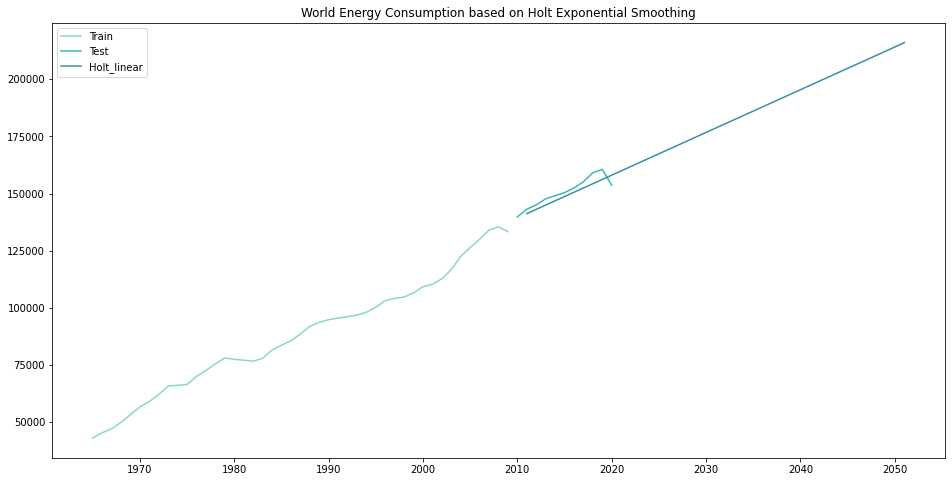

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(energy_total_pred['energy_total_prediction'], label='Holt_linear')
plt.legend(loc='best')
plt.title('World Energy Consumption based on Holt Exponential Smoothing')
plt.show()

#### Renewable Energy Consumption

In [ ]:
renewable.head(5)

,index,year,renewable_total
0,4947,1965,2653.367588
1,4948,1966,2848.279138
2,4949,1967,2927.621754
3,4950,1968,3109.348301
4,4951,1969,3310.831944


In [ ]:
data = renewable[['year','renewable_total']]
data.head(5)

,year,renewable_total
0,1965,2653.367588
1,1966,2848.279138
2,1967,2927.621754
3,1968,3109.348301
4,1969,3310.831944


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             56 non-null     int64  
 1   renewable_total  56 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.0 KB


In [ ]:
data.year = pd.to_datetime(data["year"], format="%Y")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.set_index('year',inplace=True)

Text(0.5, 0.98, 'Time Series Decomposition')

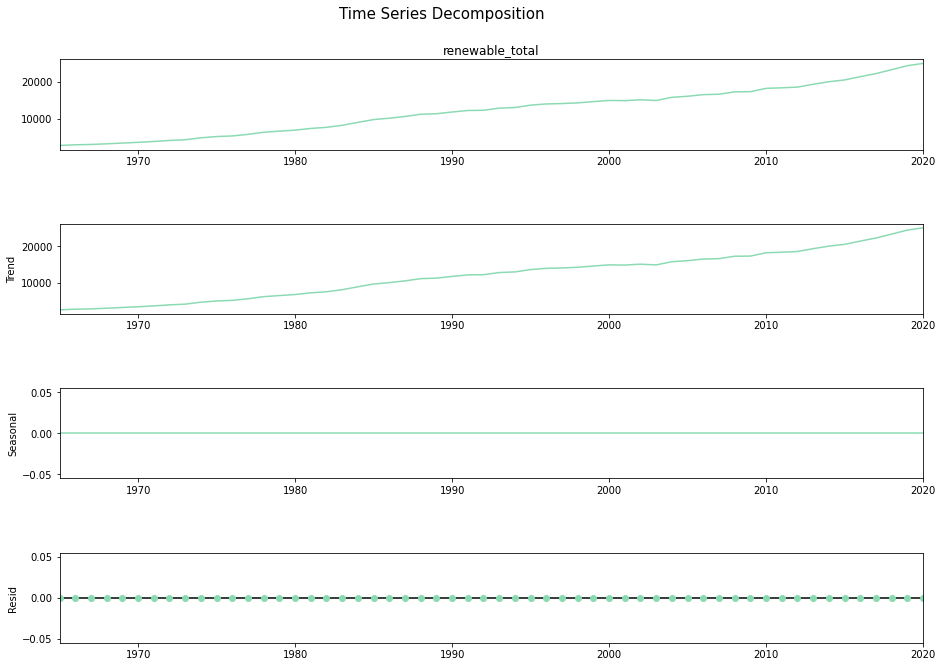

In [ ]:
## use the additive model
result=seasonal_decompose(data['renewable_total'],model='additive')

## create time series decomposition to see the trend and seasonality
fig = result.plot()
fig.set_size_inches(15,10)
fig.suptitle("Time Series Decomposition", fontsize = 15)

ADF Test:
ADF Statistic: 1.507147
p-value: 0.997550
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Result: The series is not stationary


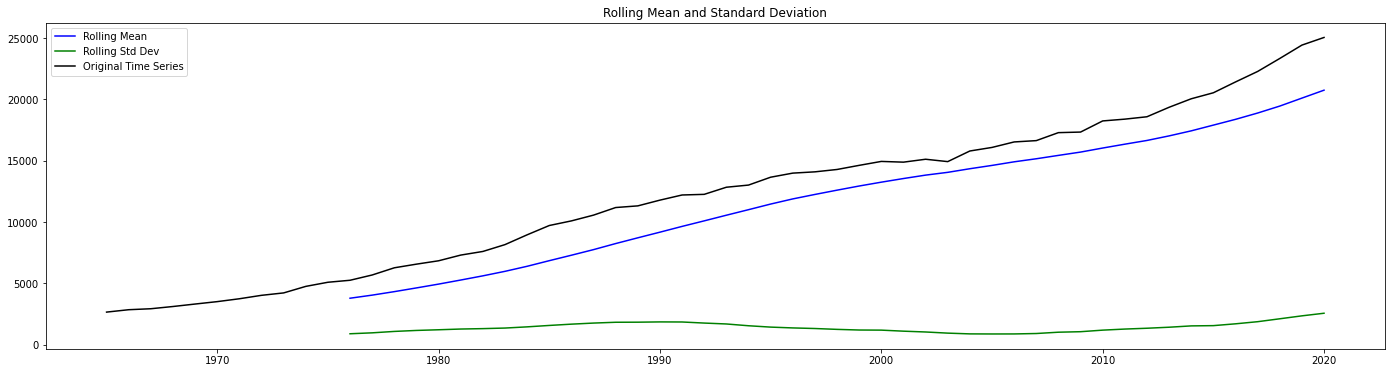

In [ ]:
stationarity_test(data['renewable_total'])

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


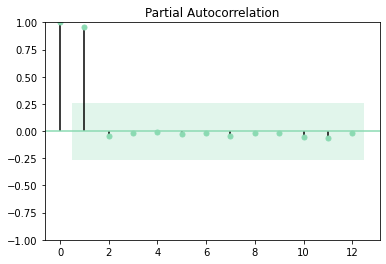

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['renewable_total'].dropna(), lags=12)

ADF Test:
ADF Statistic: -2.766988
p-value: 0.063146
Critical Values:
	1%: -3.560
	5%: -2.918
	10%: -2.597
Result: The series is not stationary


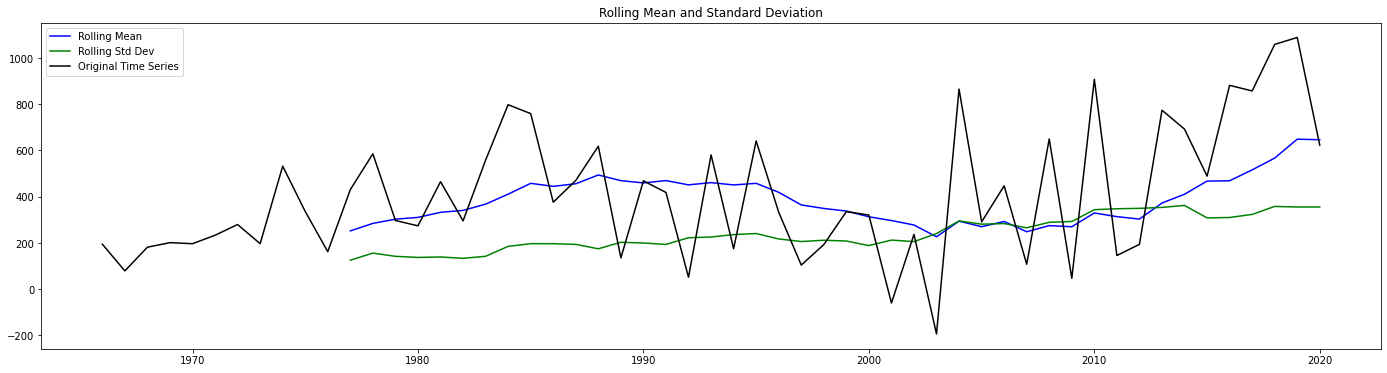

In [ ]:
stationarity_test(data['renewable_total'].diff().dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


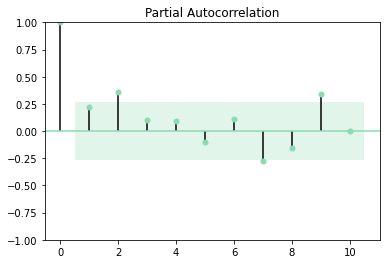

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['renewable_total'].diff().dropna(), lags=10)

ADF Test:
ADF Statistic: -7.120042
p-value: 0.000000
Critical Values:
	1%: -3.566
	5%: -2.920
	10%: -2.598
Result: The series is stationary


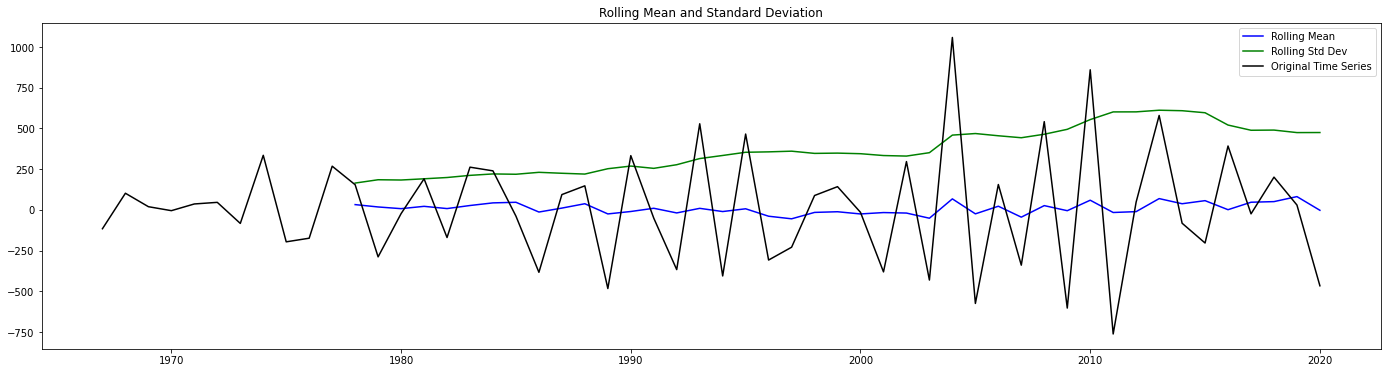

In [ ]:
stationarity_test(data['renewable_total'].diff().diff().dropna())

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


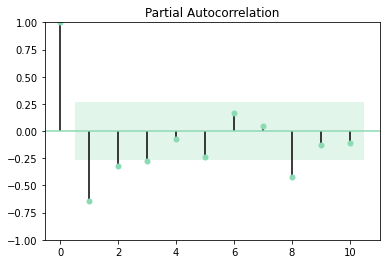

In [ ]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(data['renewable_total'].diff().diff().dropna(), lags=10)

In [ ]:
train_data = data['renewable_total'].loc[:"2009-01-01"]
test_data = data['renewable_total'].loc["2010-01-01":]

print("Training Set Shape - ", train_data.shape)
print("Testing Set Shape - ", test_data.shape)

Training Set Shape -  (45,)
Testing Set Shape -  (11,)


In [ ]:
train_data

year
1965-01-01     2653.367588
1966-01-01     2848.279138
1967-01-01     2927.621754
1968-01-01     3109.348301
1969-01-01     3310.831944
1970-01-01     3507.699399
1971-01-01     3741.126897
1972-01-01     4021.003536
1973-01-01     4217.949000
1974-01-01     4750.250695
1975-01-01     5086.533242
1976-01-01     5249.033531
1977-01-01     5680.060956
1978-01-01     6265.703925
1979-01-01     6562.989020
1980-01-01     6837.127514
1981-01-01     7302.223950
1982-01-01     7597.773233
1983-01-01     8155.845380
1984-01-01     8953.773273
1985-01-01     9713.271267
1986-01-01    10089.638570
1987-01-01    10560.102562
1988-01-01    11178.480802
1989-01-01    11314.052453
1990-01-01    11782.907840
1991-01-01    12201.383542
1992-01-01    12253.311898
1993-01-01    12834.232779
1994-01-01    13009.589344
1995-01-01    13650.819356
1996-01-01    13984.233748
1997-01-01    14088.645510
1998-01-01    14281.568045
1999-01-01    14617.296405
2000-01-01    14938.225040
2001-01-01    14878.589

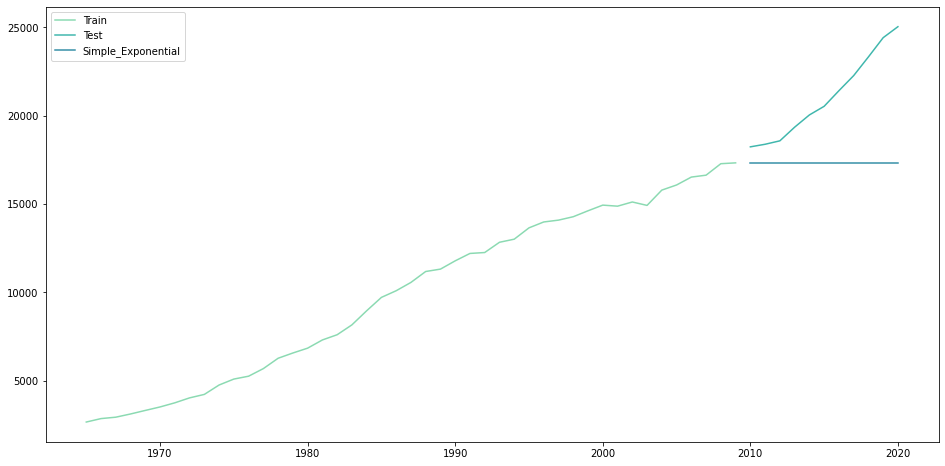

Smoothing Level :- 1.0


In [ ]:
# Simple Exponential Smoothing Method
pred_values_data = test_data.copy()
pred_values_data = pd.DataFrame(pred_values_data)

Simple_Exponential_data = pd.DataFrame(columns = ['RMS','Smoothing Level'])
from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 1)
for i in list(perm):
  fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = i[0])
  pred_values_data['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

  rms = round(sqrt(mean_squared_error(test_data.values, pred_values_data.Simple_Exponential)),3)
  Simple_Exponential_data = Simple_Exponential_data.append(other = {'RMS' : rms , 'Smoothing Level' : i[0]} , ignore_index=True)

opt_values = Simple_Exponential_data.loc[Simple_Exponential_data['RMS'] == min(Simple_Exponential_data['RMS']),['Smoothing Level']].values


# Using optimised values from the lists.
fit_sim_exp = SimpleExpSmoothing(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0])
pred_values_data['Simple_Exponential'] = fit_sim_exp.forecast(len(test_data))

plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values_data['Simple_Exponential'], label='Simple_Exponential')
plt.legend(loc='best')
plt.show()

rms_sim_exp = sqrt(mean_squared_error(test_data.values, pred_values_data.Simple_Exponential))
print("Smoothing Level :- "+str(round(opt_values[0][0],3)))

In [ ]:
y_true = test_df.values
y_pred =  pred_values.Simple_Exponential
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Simple Exponential Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Simple Exponential Model:
MAE: 16853.851587644545
MAPE: 0.11045592786770939
RMSE: 17948.114379130744
R-Squared: -7.458867983492198


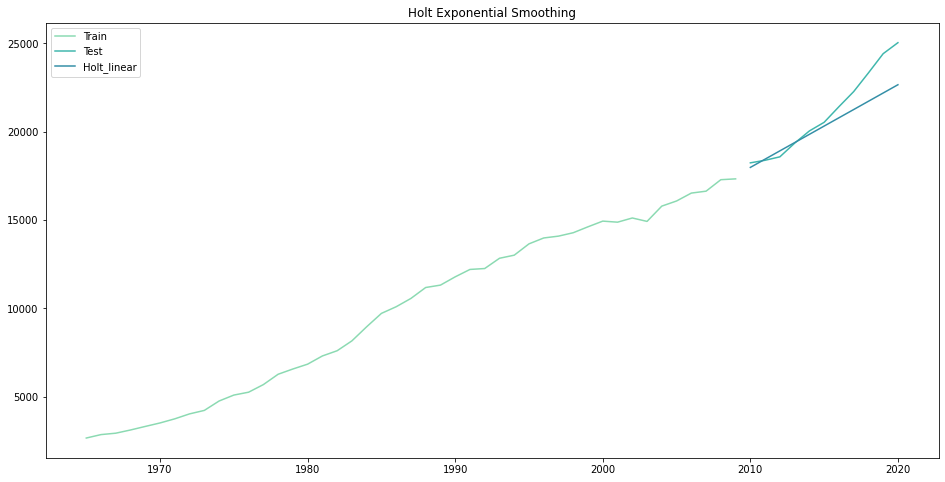

Smoothing Level :- 0.25 & Smoothing Slope :- 1.0


In [ ]:
# Holt's Exponential Smoothing Method
holt_linear_data = pd.DataFrame(columns = ['RMS','Smoothing Level','Smoothing Slope'])

from itertools import permutations
perm = permutations(list(np.linspace(0.05,1,num=20)), 2)
for i in list(perm):
  fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = i[0],smoothing_trend=i[1])
  pred_values_data['Holt_linear'] = fit_holt.forecast(len(test_data))

  rms = round(sqrt(mean_squared_error(test_data.values, pred_values_data.Holt_linear)),3)
  holt_linear_data = holt_linear_data.append(other = {'RMS' : rms , 'Smoothing Level' : i[0], 'Smoothing Slope':i[1]} , ignore_index=True)

opt_values = holt_linear_data.loc[holt_linear_data['RMS'] == min(holt_linear_data['RMS']),['Smoothing Level','Smoothing Slope']].values


# Using optimised values from the lists.
fit_holt = Holt(np.asarray(train_data)).fit(smoothing_level = opt_values[0][0],smoothing_trend=opt_values[0][1])
pred_values_data['Holt_linear'] = fit_holt.forecast(len(test_data))
pred_values_data.index = test_data.index

plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(pred_values_data['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title('Holt Exponential Smoothing')
plt.show()

rms_holt_exp = sqrt(mean_squared_error(test_data.values, pred_values_data.Holt_linear))
print("Smoothing Level :- "+str(round(opt_values[0][0],3)) + " & Smoothing Slope :- "+str(round(opt_values[0][1],3)))

In [ ]:
y_true = test_df.values
y_pred =  pred_values_data.Holt_linear
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of sklearn.metrics for Simple Exponential Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of sklearn.metrics for Simple Exponential Model:
MAE: 130219.28977992485
MAPE: 0.8651603963910016
RMSE: 130308.79375993049
R-Squared: -444.8841547656092


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=597.429, Time=0.38 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=625.363, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=603.823, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=598.056, Time=0.16 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=623.368, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=599.195, Time=0.52 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=598.656, Time=0.54 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=597.953, Time=0.33 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=602.612, Time=0.42 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=600.618, Time=0.61 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=595.543, Time=0.15 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=596.093, Time=0.11 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=601.831, Time=0.09 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=597.293, Time=0.26 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=596.7

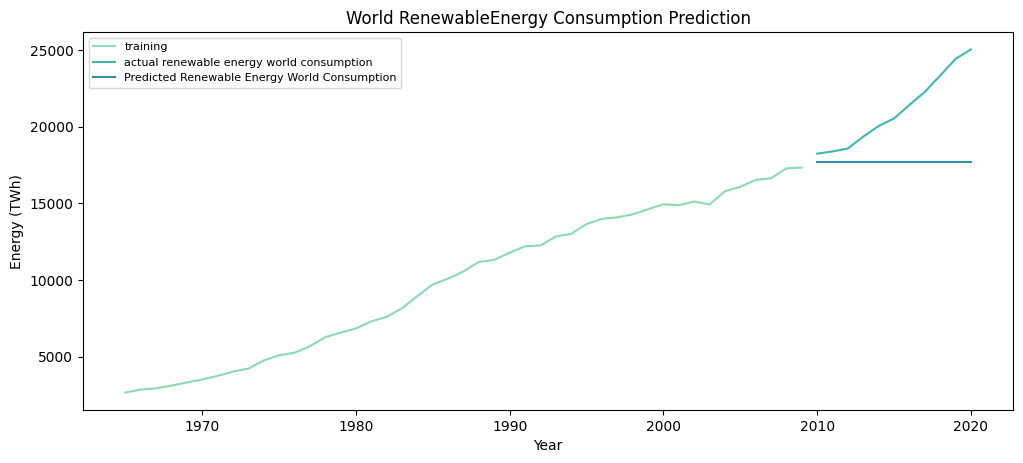

Auto-Arima RMSE :- 4062.314


In [ ]:
# Auto ARIMA Method
arima_model = auto_arima(train_data,
                      start_p=1, start_q=1,
                      max_p=5, max_q=5,
                      test='adf',        
                      trace=True,
                      alpha=0.05,
                      scoring='mse',
                      suppress_warnings=True,
                      seasonal = False
                      )

# Fitting the final model with the order
fitted_model = arima_model.fit(train_data) 
print(fitted_model.summary())

# Forecasting the values.
forecast_values = fitted_model.predict(len(test_data), alpha=0.05) 
fcv_series = pd.Series(forecast_values[0], index=test_data.index)

#Plotting the predicted stock price and original price.
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, label='actual renewable energy world consumption')
plt.plot(fcv_series,label='Predicted Renewable Energy World Consumption')
plt.title('World RenewableEnergy Consumption Prediction')
plt.xlabel('Year')
plt.ylabel('Energy (TWh)')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Evaluating the model by calculating RMSE.
rms_auto_arima = sqrt(mean_squared_error(test_data.values, fcv_series))
print("Auto-Arima RMSE :- " + str(round(rms_auto_arima,3)))

In [ ]:
y_true = test_df.values
y_pred =  fcv_series
mae = metrics.mean_absolute_error(y_true,y_pred)
mape = metrics.mean_absolute_percentage_error(y_true,y_pred)
mse = metrics.mean_squared_error(y_true,y_pred)
rmse = np.sqrt(mse) #mse**(0.5)  
r2 = metrics.r2_score(y_true,y_pred)

print("Results of ARIMA Model:")
print("MAE:", mae)
print("MAPE:", mape)
print("RMSE:", rmse)
print("R-Squared:", r2)

Results of ARIMA Model:
MAE: 132815.78191329486
MAPE: 0.8820595430524025
RMSE: 132959.07047534556
R-Squared: -463.20576589787225


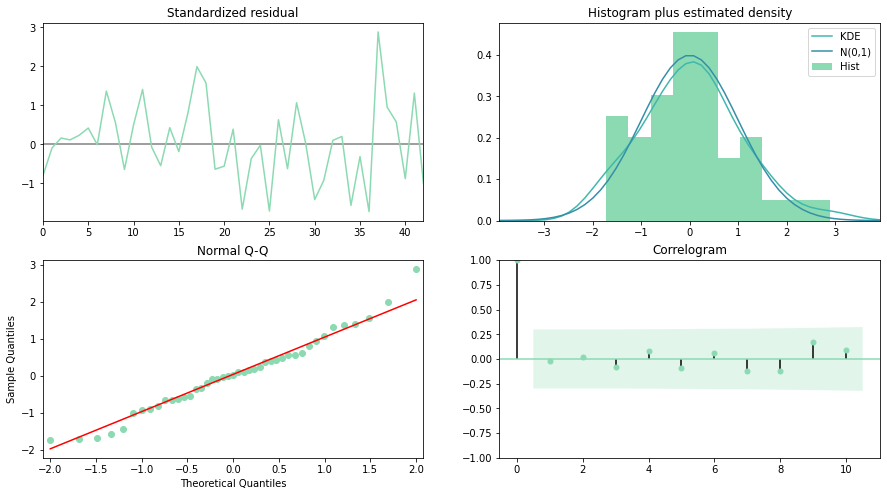

In [ ]:
# Plotting the diagnostics of the fiited model.
arima_model.plot_diagnostics(figsize=(15,8))
plt.show()

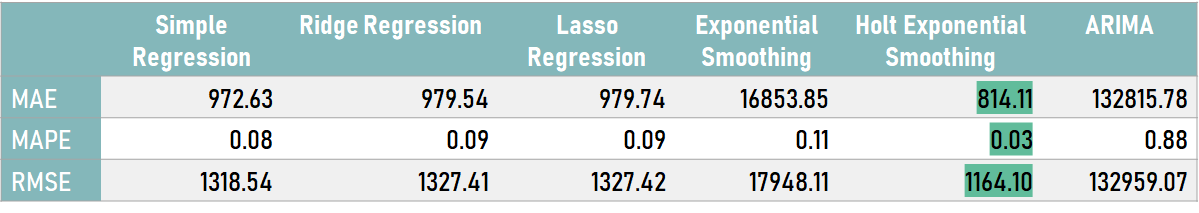

Holt Exponential Smoothing has the lowest MAE, MAPE, and RMSE. Therefore Holt Exponential Smoothing is choosen for prediction.

#### Prediction Renewable Energy Consumption

In [ ]:
renewable.head()

,index,year,renewable_total
0,4947,1965,2653.367588
1,4948,1966,2848.279138
2,4949,1967,2927.621754
3,4950,1968,3109.348301
4,4951,1969,3310.831944


In [ ]:
renewable_total_pred = fit_holt.forecast(len(test_data)+30)
renewable_total_pred = pd.DataFrame(renewable_total_pred, columns = ['renewable_prediction'])

In [ ]:
renewable_total_pred

,renewable_prediction
0,17980.599237
1,18448.759405
2,18916.919574
3,19385.079743
4,19853.239912
5,20321.400081
6,20789.560250
7,21257.720419
8,21725.880587
9,22194.040756


In [ ]:
renewable_total_pred ['year'] = [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032
                              , 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045,
                              2046, 2047, 2048, 2049, 2050, 2051]

In [ ]:
renewable_total_pred

,renewable_prediction,year
0,17980.599237,2011
1,18448.759405,2012
2,18916.919574,2013
3,19385.079743,2014
4,19853.239912,2015
5,20321.400081,2016
6,20789.560250,2017
7,21257.720419,2018
8,21725.880587,2019
9,22194.040756,2020


In [ ]:
renewable_total_pred.year = pd.to_datetime(renewable_total_pred["year"], format="%Y")

In [ ]:
renewable_total_pred.set_index('year',inplace=True)
renewable_total_pred

,renewable_prediction
year,
2011-01-01,17980.599237
2012-01-01,18448.759405
2013-01-01,18916.919574
2014-01-01,19385.079743
2015-01-01,19853.239912
2016-01-01,20321.400081
2017-01-01,20789.560250
2018-01-01,21257.720419
2019-01-01,21725.880587


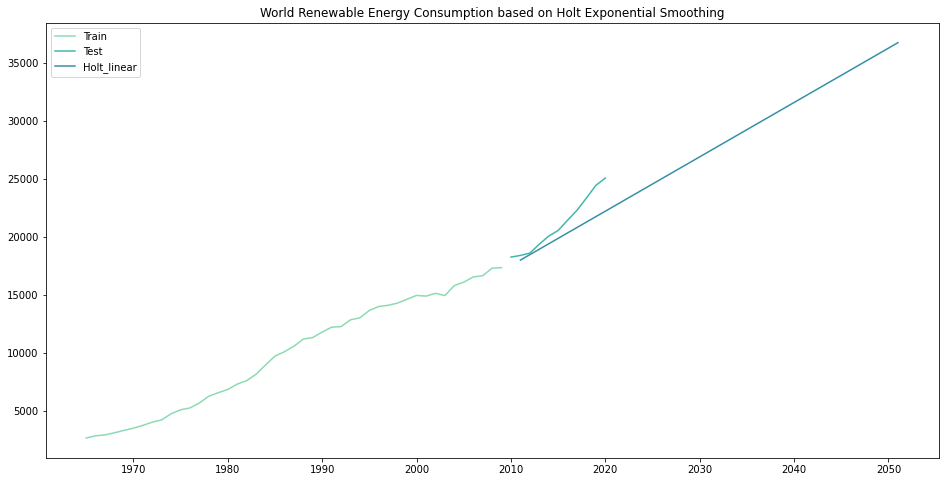

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(train_data, label='Train')
plt.plot(test_data, label='Test')
plt.plot(renewable_total_pred['renewable_prediction'], label='Holt_linear')
plt.legend(loc='best')
plt.title('World Renewable Energy Consumption based on Holt Exponential Smoothing')
plt.show()

### Forecast Result

In [ ]:
final_prediction = pd.merge(energy_total_pred, renewable_total_pred, on=['year'])
final_prediction

,energy_total_prediction,renewable_prediction
year,,
2011-01-01,141220.221657,17980.599237
2012-01-01,143089.147181,18448.759405
2013-01-01,144958.072706,18916.919574
2014-01-01,146826.998230,19385.079743
2015-01-01,148695.923755,19853.239912
2016-01-01,150564.849280,20321.400081
2017-01-01,152433.774804,20789.560250
2018-01-01,154302.700329,21257.720419
2019-01-01,156171.625853,21725.880587


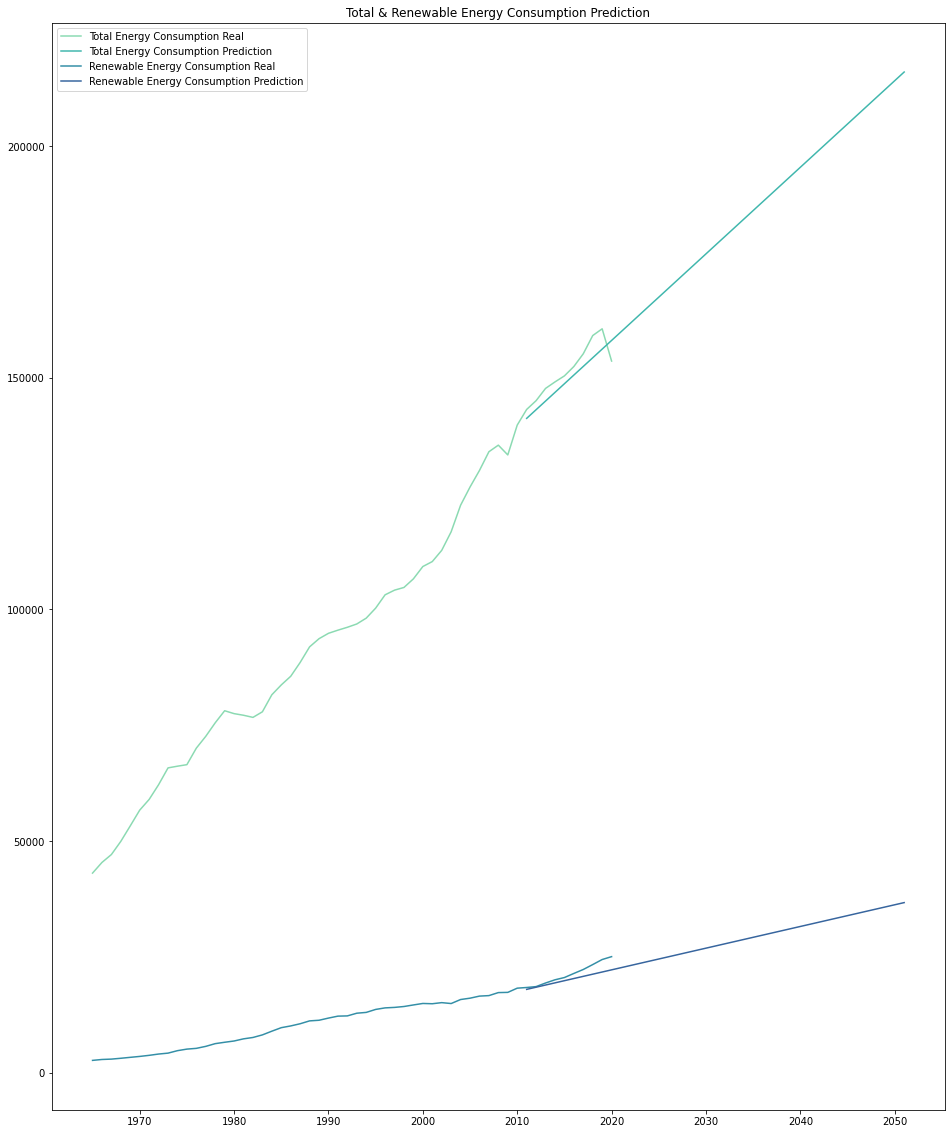

In [ ]:
plt.figure(figsize=(16,20))
plt.plot(df['energy_total'], label='Total Energy Consumption Real')
plt.plot(final_prediction['energy_total_prediction'], label='Total Energy Consumption Prediction')
plt.plot(data['renewable_total'], label='Renewable Energy Consumption Real')
plt.plot(final_prediction['renewable_prediction'], label='Renewable Energy Consumption Prediction')
plt.legend(loc='best')
plt.title('Total & Renewable Energy Consumption Prediction')
plt.show()

The forecast results show that the Net Zero Energy Mix target failed to meet the target of only 15.70% from 35% in 2035 and only 17.14% of 50% in 2050 so efforts were needed to accelerate an increase in the increase in renewable energy.

### Clustering

In [ ]:
temp_country22 =temp_country.sort_values(by=['energy_total'], ascending=False)

In [ ]:
temp_country22 = temp_country22.reset_index()

In [ ]:
temp_country22 = temp_country22.head(23)
temp_country22

,index,entity,year,energy_total
0,4162,World,2020,153593.345591
1,681,China,2020,40205.612739
2,3958,United States,2020,24274.675985
3,1532,India,2020,8837.288286
4,3015,Russia,2020,7862.609703
5,1924,Japan,2020,4674.827030
6,569,Canada,2020,3770.207007
7,1644,Iran,2020,3341.653124
8,1252,Germany,2020,3289.622781
9,457,Brazil,2020,3254.323685


In [ ]:
energy_cluster = country.copy()

In [ ]:
energy_cluster.head() 

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
0,56,Algeria,1965,0.0,1.111111,0.0,0.0,0.0,0.0,0.81410,15.405252,7.430500,24.760963,1.111111
1,57,Algeria,1966,0.0,0.986111,0.0,0.0,0.0,0.0,0.79084,20.272705,7.719250,29.768906,0.986111
2,58,Algeria,1967,0.0,1.138889,0.0,0.0,0.0,0.0,0.60476,18.942031,7.488250,28.173930,1.138889
3,59,Algeria,1968,0.0,1.563889,0.0,0.0,0.0,0.0,0.63965,20.167301,7.873250,30.244090,1.563889
4,60,Algeria,1969,0.0,1.002778,0.0,0.0,0.0,0.0,0.81410,21.305930,10.351688,33.474495,1.002778


In [ ]:
filter_cluster = energy_cluster[energy_cluster['year']==2020]
filter_cluster = filter_cluster[filter_cluster['entity']!='World']
filter_cluster.head()

,index,entity,year,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,energy_total,renewable_total
55,111,Algeria,2020,0.019750,0.123356,1.480272,0.000000,0.000000,0.000000,4.803190,201.254851,430.815000,638.496419,1.623378
111,167,Argentina,2020,23.364362,75.354713,3.316651,26.305481,9.645983,0.413941,8.860226,287.444358,439.298596,874.004311,138.401131
167,279,Australia,2020,55.773919,35.858714,58.822711,0.000000,1.602917,3.410424,469.094606,508.277424,408.985963,1541.826678,155.468685
223,335,Austria,2020,16.761960,101.037847,3.924139,0.000000,5.190880,5.253975,25.911700,133.295999,85.275190,376.651691,132.168802
259,371,Azerbaijan,2020,0.234623,2.634884,0.116448,0.000000,0.000000,0.098218,0.007167,50.572065,118.936850,172.600256,3.084174


In [ ]:
country_cluster = filter_cluster.drop(columns=['year', 'energy_total', 'renewable_total','index'])
country_cluster

,entity,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas
55,Algeria,0.019750,0.123356,1.480272,0.000000,0.000000,0.000000,4.803190,201.254851,430.815000
111,Argentina,23.364362,75.354713,3.316651,26.305481,9.645983,0.413941,8.860226,287.444358,439.298596
167,Australia,55.773919,35.858714,58.822711,0.000000,1.602917,3.410424,469.094606,508.277424,408.985963
223,Austria,16.761960,101.037847,3.924139,0.000000,5.190880,5.253975,25.911700,133.295999,85.275190
259,Azerbaijan,0.234623,2.634884,0.116448,0.000000,0.000000,0.098218,0.007167,50.572065,118.936850
...,...,...,...,...,...,...,...,...,...,...
3902,United Kingdom,186.538523,15.983978,31.581519,124.042609,18.287033,39.408170,53.769135,662.765076,724.954696
3958,United States,841.088157,712.199360,330.521835,2051.393891,347.151779,76.825458,2556.326902,9038.974147,8320.194456
3994,Uzbekistan,0.000000,16.793639,0.038240,0.000000,0.000000,0.000000,27.764406,45.247663,430.335838
4050,Venezuela,0.000000,78.073850,0.031015,0.000000,0.000000,0.000000,0.151652,134.658174,187.514501


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

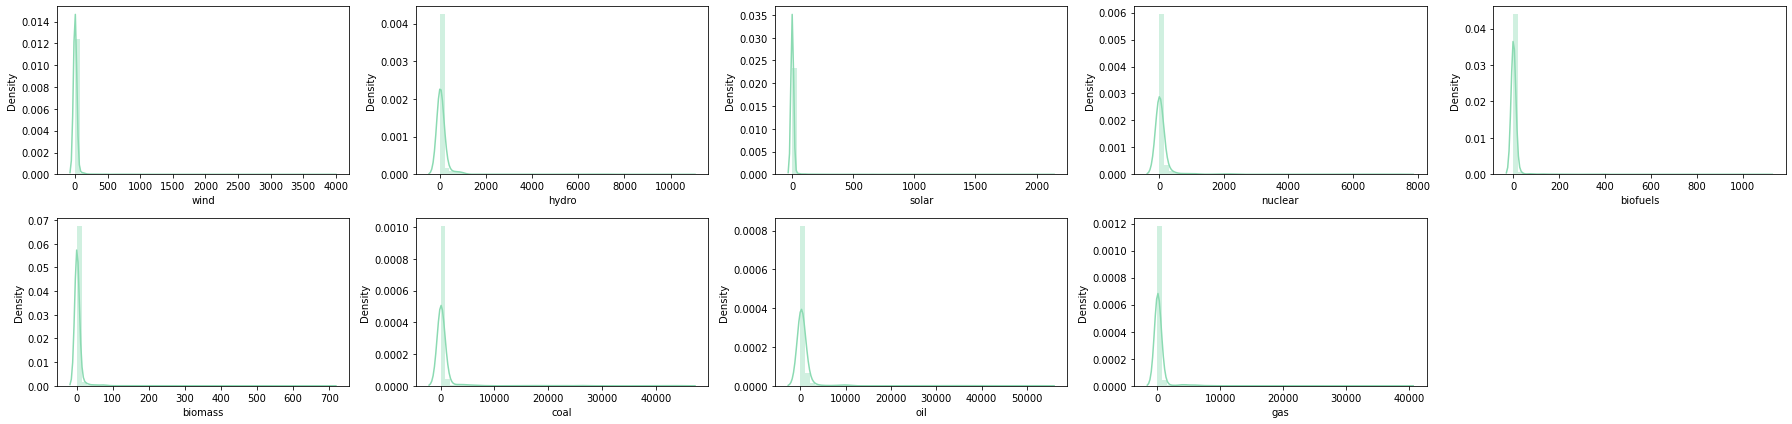

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(25,6))

features = country_cluster.select_dtypes('number').columns
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=country[features[i]])
    plt.xlabel(features[i])
    plt.tight_layout()

In [ ]:
temp_cluster = country_cluster.set_index('entity')

In [ ]:
# Import the library
# Extract the specific column and convert it as a numpy array
from sklearn.preprocessing import power_transform
# Transform the data
X = temp_cluster.values
X_transformed = power_transform(X, method='yeo-johnson')

In [ ]:
# Import the library
# Instantiate the object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the data
X_transformed = scaler.fit_transform(X_transformed)

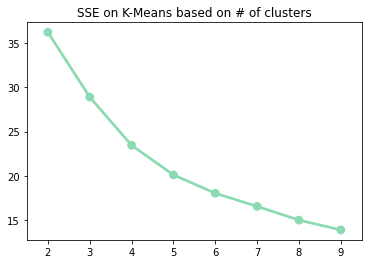

In [ ]:
# Import the library
# To make sure our work becomes reproducible
from sklearn.cluster import KMeans
np.random.seed(42)
# Iterating the process
inertia = []
for i in range(2, 10):
  # Instantiate the model
    model = KMeans(n_clusters=i)
  # Fit The Model
    model.fit(X_transformed)
  # Extract the error of the model
    inertia.append(model.inertia_)# Visualize the model
sns.pointplot(x=list(range(2, 10)), y=inertia)
plt.title('SSE on K-Means based on # of clusters')
plt.show()

cluster 5 and 4 are selected.

In [ ]:
# To make sure our work becomes reproducible
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=5)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
country_cluster['cluster'] = cluster
country_cluster.head()

,entity,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,cluster
55,Algeria,0.019750,0.123356,1.480272,0.000000,0.000000,0.000000,4.803190,201.254851,430.815000,3
111,Argentina,23.364362,75.354713,3.316651,26.305481,9.645983,0.413941,8.860226,287.444358,439.298596,1
167,Australia,55.773919,35.858714,58.822711,0.000000,1.602917,3.410424,469.094606,508.277424,408.985963,4
223,Austria,16.761960,101.037847,3.924139,0.000000,5.190880,5.253975,25.911700,133.295999,85.275190,4
259,Azerbaijan,0.234623,2.634884,0.116448,0.000000,0.000000,0.098218,0.007167,50.572065,118.936850,3


In [ ]:
for i in range(5):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(country_cluster[country_cluster['cluster'] == i]['entity'].values)))
    print("Total Members:", len(list(country_cluster[country_cluster['cluster'] == i]['entity'].values)))
    print()

Cluster: 0
The Members: Bulgaria | Czechia | Hungary | Iran | Pakistan | Romania | Russia | Slovakia | Slovenia | Switzerland | Taiwan | Ukraine | United Arab Emirates
Total Members: 13

Cluster: 1
The Members: Argentina | Belgium | Brazil | Canada | China | Finland | France | Germany | India | Japan | Mexico | Netherlands | South Korea | Spain | Sweden | United Kingdom | United States
Total Members: 17

Cluster: 2
The Members: Chile | Denmark | Egypt | Greece | Ireland | Kazakhstan | Malaysia | Morocco | New Zealand | Norway | Peru | Philippines | Turkey | Vietnam
Total Members: 14

Cluster: 3
The Members: Algeria | Azerbaijan | Bangladesh | Belarus | Croatia | Cyprus | Ecuador | Estonia | Hong Kong | Iceland | Iraq | Israel | Kuwait | Latvia | Lithuania | Luxembourg | North Macedonia | Oman | Qatar | Saudi Arabia | Singapore | Sri Lanka | Trinidad and Tobago | Turkmenistan | Uzbekistan | Venezuela
Total Members: 26

Cluster: 4
The Members: Australia | Austria | Colombia | Indonesia |

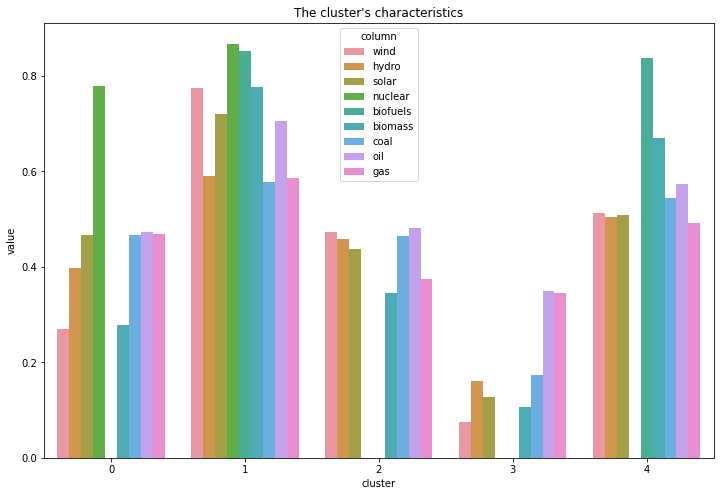

In [ ]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt# Create the dataframe to ease our visualization process
visualize = pd.DataFrame(model.cluster_centers_) #.reset_index()
visualize = visualize.T
visualize['column'] = ['wind', 'hydro', 'solar', 'nuclear', 'biofuels', 'biomass', 'coal','oil','gas']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()

In [ ]:
# To make sure our work becomes reproducible
np.random.seed(42)# Instantiate the model
model = KMeans(n_clusters=4)# Fit the model
model.fit(X_transformed)# Predict the cluster from the data and save it
cluster = model.predict(X_transformed)# Add to the dataframe and show the result
country_cluster['cluster'] = cluster
country_cluster.head(10)

,entity,wind,hydro,solar,nuclear,biofuels,biomass,coal,oil,gas,cluster
55,Algeria,0.019750,0.123356,1.480272,0.000000,0.000000,0.000000,4.803190,201.254851,430.815000,0
111,Argentina,23.364362,75.354713,3.316651,26.305481,9.645983,0.413941,8.860226,287.444358,439.298596,2
167,Australia,55.773919,35.858714,58.822711,0.000000,1.602917,3.410424,469.094606,508.277424,408.985963,3
223,Austria,16.761960,101.037847,3.924139,0.000000,5.190880,5.253975,25.911700,133.295999,85.275190,3
259,Azerbaijan,0.234623,2.634884,0.116448,0.000000,0.000000,0.098218,0.007167,50.572065,118.936850,0
309,Bangladesh,0.012528,1.728639,1.018390,0.000000,0.000000,0.003035,42.939129,92.067349,304.347568,0
345,Belarus,0.453664,0.871734,0.448383,0.000000,0.000000,0.112064,15.409020,76.568211,178.650542,0
401,Belgium,32.148714,0.695547,12.674531,84.759761,6.718335,5.331659,29.880584,258.553405,169.981800,2
457,Brazil,140.659440,978.949587,19.635041,37.736562,260.304822,55.368073,160.824516,1279.663944,321.181699,2
513,Bulgaria,3.644528,7.280770,3.694066,41.038412,0.000000,1.964136,47.680962,52.514708,29.206500,1


In [ ]:
for i in range(4):
    print("Cluster:", i)
    print("The Members:", ' | '.join(list(country_cluster[country_cluster['cluster'] == i]['entity'].values)))
    print("Total Members:", len(list(country_cluster[country_cluster['cluster'] == i]['entity'].values)))
    print()

Cluster: 0
The Members: Algeria | Azerbaijan | Bangladesh | Belarus | Croatia | Cyprus | Denmark | Ecuador | Egypt | Estonia | Greece | Hong Kong | Iceland | Iraq | Ireland | Israel | Kazakhstan | Kuwait | Latvia | Lithuania | Luxembourg | Malaysia | Morocco | New Zealand | North Macedonia | Norway | Oman | Peru | Qatar | Saudi Arabia | Singapore | Sri Lanka | Trinidad and Tobago | Turkmenistan | Uzbekistan | Venezuela | Vietnam
Total Members: 37

Cluster: 1
The Members: Bulgaria | Czechia | Hungary | Iran | Pakistan | Romania | Russia | Slovakia | Slovenia | Switzerland | Taiwan | Ukraine | United Arab Emirates
Total Members: 13

Cluster: 2
The Members: Argentina | Belgium | Brazil | Canada | China | Finland | France | Germany | India | Japan | Mexico | Netherlands | South Korea | Spain | Sweden | United Kingdom | United States
Total Members: 17

Cluster: 3
The Members: Australia | Austria | Chile | Colombia | Indonesia | Italy | Philippines | Poland | Portugal | Thailand | Turkey
Tot

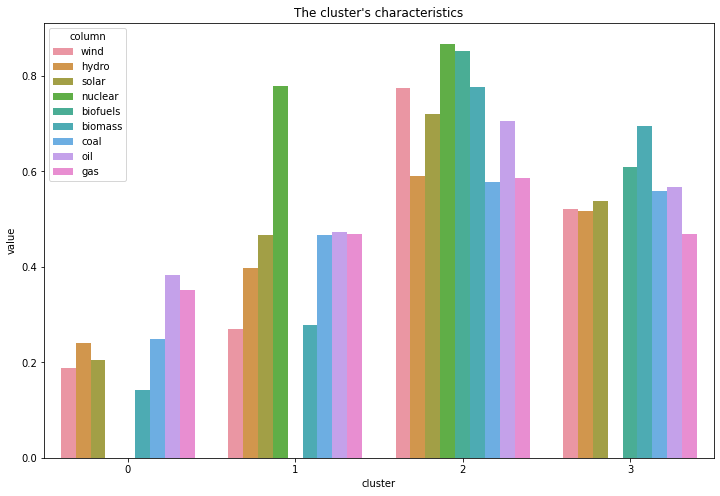

In [ ]:
# Importing libraries
import seaborn as sns
import matplotlib.pyplot as plt# Create the dataframe to ease our visualization process
visualize = pd.DataFrame(model.cluster_centers_) #.reset_index()
visualize = visualize.T
visualize['column'] = ['wind', 'hydro', 'solar', 'nuclear', 'biofuels', 'biomass', 'coal','oil','gas']
visualize = visualize.melt(id_vars=['column'], var_name='cluster')
visualize['cluster'] = visualize.cluster.astype('category')# Visualize the result
plt.figure(figsize=(12, 8))
sns.barplot(x='cluster', y='value', hue='column', data=visualize)
plt.title('The cluster\'s characteristics')
plt.show()

In [ ]:
temp_country22

,index,entity,year,energy_total
0,4162,World,2020,153593.345591
1,681,China,2020,40205.612739
2,3958,United States,2020,24274.675985
3,1532,India,2020,8837.288286
4,3015,Russia,2020,7862.609703
5,1924,Japan,2020,4674.827030
6,569,Canada,2020,3770.207007
7,1644,Iran,2020,3341.653124
8,1252,Germany,2020,3289.622781
9,457,Brazil,2020,3254.323685


Cluster 0: 
Agricultural and Service Based Country:
Algeria | Azerbaijan | Bangladesh | Belarus | Croatia | Cyprus | Denmark | Ecuador | Egypt | Estonia | Greece | Hong Kong | Iceland | Iraq | Ireland | Israel | Kazakhstan | Kuwait | Latvia | Lithuania | Luxembourg | Malaysia | Morocco | New Zealand | North Macedonia | Norway | Oman | Peru | Qatar | Saudi Arabia | Singapore | Sri Lanka | Trinidad and Tobago | Turkmenistan | Uzbekistan | Venezuela | Vietnam Total Members: 37

Cluster 1
Fossil Fuel Producer
Bulgaria | Czechia | Hungary | Iran | Pakistan | Romania | Russia | Slovakia | Slovenia | Switzerland | Taiwan | Ukraine | United Arab Emirates Total Members: 13 

Cluster 2
Emission Intensive Producer
Argentina | Belgium | Brazil | Canada | China | Finland | France | Germany | India | Japan | Mexico | Netherlands | South Korea | Spain | Sweden | United Kingdom | United States Total Members: 17 

Cluster 3
Emerging Energy Consumer Country
Australia | Austria | Chile | Colombia | Indonesia | Italy | Philippines | Poland | Portugal | Thailand | Turkey Total Members: 11



### Follow up Action

To accelerate the process of achieving the Net Zero Energy Mix target, a regional policy variation and effort is required according to the nature of the consumption of each country according to the results of the clustering.


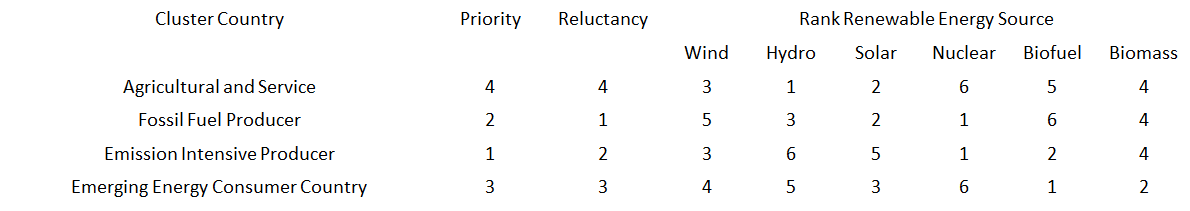

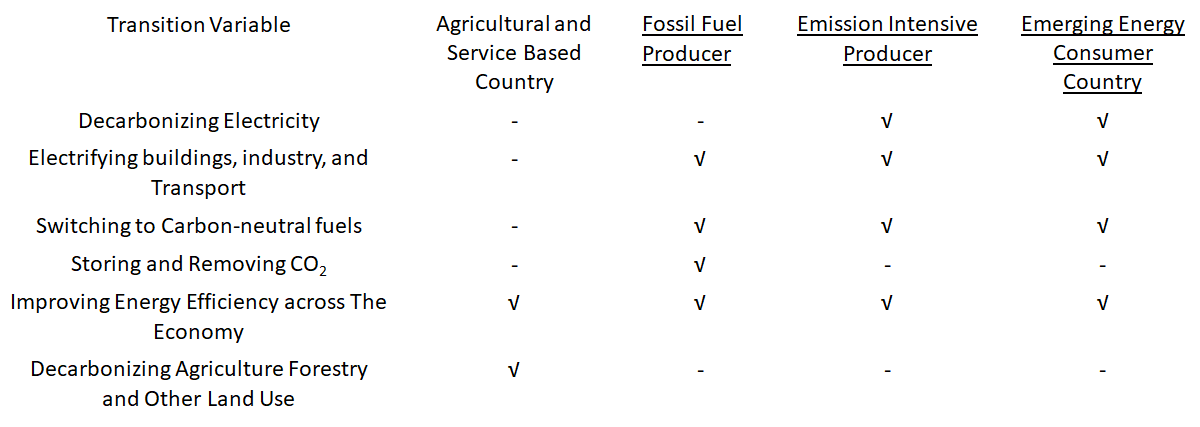

### Conclusion and Recommendation

Conclusion:
1. Regression Model Simple Linear Regression (Baseline Model), Ridge and Lasso Linear Regression, Simple Exponential Regression, Holt Exponential Regression, and ARIMA have been applied based on Dataset.
2. Holt Exponential Regression is selected to forecast Total Energy Consumption and Renewable Energy Consumption from 2021-2050 due to the smallest MAE, MAPE, and RMSE.
3. The forecast results show that the Net Zero Energy Mix target failed to meet the target of only 15.70% from 35% in 2035 and only 17.14% of 50% in 2050 so efforts were needed to accelerate an increase in the increase in renewable energy.

1. Forecasting needs to be done with more advanced methods such as fbprophet or LSTM to forecast Total Energy Consumption and Renewable Energy Consumption.
2. To accelerate the process of achieving the Net Zero Energy Mix target, a regional policy variation and effort is required according to the nature of the consumption of each country according to the results of the clustering.
